# Plot/Edit using plotms

Using plotms to plot and edit visibilities and calibration tables

<span style="font-size: 12pt;">**plotms** is a GUI-style plotter, based
on Qt, for creating X-Y plots of visibility data and calibration tables.
It can either be started as a task within CASA or from outside CASA
(type <span style="font-family: monospace;">casaplotms</span> on the
command line).  This task also provides editing capability.</span>

<span style="font-size: 12pt;">**plotms** was originally intended to
plot MeasurementSets (the "ms" in "plotms"), but has been extended to
include calibration tables.  Supported cal table types include B Jones,
B TSYS, EGainCurve, F Jones, G Jones, K Jones, Kcross Jones, KAntPos, T
Jones, TOpac, Xf Jones, A Mueller, BPOLY, and GSPLINE.  Some options
(axis choice, averaging, channel selection) do not apply to calibration
tables or have not been implemented yet.  Other options, such as
calibration axes, do not apply to MeasurementSets. For simplicity, this
document primarily addresses plotting MeasurementSets.</span>

<span style="font-size: 12pt;">The current inputs and default values for
**plotms** include:</span>

<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">plotms
:: A plotter/interactive flagger for visibility data.</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">vis                
=         ''        \#  input MS (or CalTable) (blank for none)</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">gridrows           
=          1        \#  Number of subplot rows (default 1).    </span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">gridcols           
=          1        \#  Number of subplot columns (default 1). </span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">rowindex           
=          0        \#  Row location of the plot (0-based, default
0)</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">colindex           
=          0        \#  Column location of the plot (0-based, default
0)</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">plotindex          
=          0        \#  Index to address a subplot (0-based, default 0)
</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">xaxis              
=         ''        \#  plot x-axis (blank for default/current)       
 </span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">yaxis              
=         ''        \#  plot y-axis (blank for default/current)       
 </span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">selectdata         
=       True        \#  data selection parameters                     
 </span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">    
field          =         ''        \#  field names or field index
numbers (blank for all)</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">    
spw            =         ''        \#  spectral windows:channels (blank
for all)</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">    
timerange      =         ''        \#  time range (blank for
all)</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">    
uvrange        =         ''        \#  uv range (blank for all)</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">    
antenna        =         ''        \#  antenna/baselines (blank for
all)</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">    
scan           =         ''        \#  scan numbers (blank for
all)</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">    
correlation    =         ''        \#  correlations (blank for
all)</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">    
array          =         ''        \#  (sub)array numbers (blank for
all)</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">    
observation    =         ''        \#  observation ID(s) (blank for
all)</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">    
intent         =         ''        \#  observing intent (blank for
all)</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">    
feed           =         ''        \#  Select feed (blank for
all)</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">    
msselect       =         ''        \#  MS selection (blank for
all)</span>  
  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">averagedata        
=       True        \#  data averaging parameters</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">    
avgchannel     =         ''        \#  average over channel?  (blank =
False, otherwise</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">                                       
\#   value in channels)</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">    
avgtime        =         ''        \#  average over time? (blank =
False, other value in</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">                                       
\#   seconds)</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">    
avgscan        =      False        \#  only valid if time averaging is
turned on.  average</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">                                       
\#   over scans?</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">    
avgfield       =      False        \#  only valid if time averaging is
turned on.  average</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">                                       
\#   over fields?</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">    
avgbaseline    =      False        \#  average over all baselines? 
(mutually exclusive</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">                                       
\#   with avgantenna)</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">    
avgantenna     =      False        \#  average by per-antenna? 
(mutually exclusive with</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">                                       
\#   avgbaseline)</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">    
avgspw         =      False        \#  average over all spectral
windows?</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">    
scalar         =      False        \#  Do scalar averaging?</span>  
  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">transform          
=      False        \#  transform data in various ways?</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">extendflag         
=      False        \#  have flagging extend to other data
points?</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">iteraxis           
=         ''        \#  the axis over which to iterate</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">customsymbol       
=      False        \#  set a custom symbol(s) for unflagged
points</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">coloraxis          
=         ''        \#  selects which data to use for
colorizing</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">customflaggedsymbol
=      False        \#  set a custom plot symbol for flagged
points</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">xconnector         
=          ''       \#  Set connector for data points  
                                        \#   (blank="none";
"line","step")</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">plotrange          
=         \[\]        \#  plot axes ranges:
\[xmin,xmax,ymin,ymax\]</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">title              
=         ''        \#  Title written along top of plot</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">titlefont          
=          0        \#  Font for plot title</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">xlabel             
=         ''        \#  Text for horizontal axis. Blank for
default.</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">xaxisfont          
=          0        \#  Font for plot x-axis</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">ylabel             
=         ''        \#  Text for vertical axis. Blank for
default.</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">yaxisfont          
=          0        \#  Font for plot y-axis.</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">showmajorgrid      
=      False        \#  Show major grid lines (horiz and vert.)</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">showminorgrid      
=      False        \#  Show minor grid lines (horiz and vert.)</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">showlegend         
=      False        \#  Show a legend on the plot.</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">plotfile           
=         ''        \#  Name of plot file to save
automatically.</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">showgui            
=       True        \#  Show GUI</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">    
clearplots     =       True        \#  Remove any existing plots so new
ones can replace</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">                                       
\#   them.</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">callib             
=       \[''\]        \#  Calibration library string or filename for
on-the-</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">                                       
\#   fly calibration.</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">headeritems        
=         ''        \# Comma-separated list of pre-defined</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">                                       
\#   page header items. </span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">showatm            
=     False         \# Compute and overlay the atmospheric</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">                                       
\#   transmission curve.</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">showtsky           
=     False         \# Compute and overlay the sky</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">                                       
\#   temperature curve.</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">showimage          
=     False         \# Compute and overlay the image</span>  
<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">                                       
\#   sideband curve.</span>

<span style="font-size: 12pt;">Note that when some parameters are set or
are True, their subparameters are displayed by inp( ).  By default,
selectdata, averagedata, and showgui are True and their subparameters
are shown above.  Other parameters with subparameters include:</span>

<span
style="font-size: 10pt; font-family: courier new,courier,monospace;"><span
style="font-size: 10pt; font-family: courier new,courier,monospace;"><span
style="font-size: 10pt; font-family: courier new,courier,monospace;"><span
style="font-size: 10pt; font-family: courier new,courier,monospace;">xaxis              
=     'real'        \#  plot x-axis (blank for default/current)       
   
     xdatacolumn    =         ''        \#  data column to use for
x-axis (blank for          
                                        \#  
default/current)                                 
  
yaxis               =     'imag'        \#  plot y-axis (blank for
default/current)  
     ydatacolumn    =         ''        \#  data column to use for
y-axis (blank for  
                                        \#  default/current)  
     yaxislocation  =      'left'       \#  yaxis is to the left of the
plot  
</span>transform           =       True        \#  transform data in
various ways?  
     freqframe      =         ''        \#  the frame in which to render
frequency and velocity  
                                        \#   axes  
     restfreq       =         ''        \#  Rest frequency to use for
velocity conversions  
     veldef         =    'RADIO'        \#  the definition in which to
render velocity  
     shift          = \[0.0, 0.0\]        \#  Adjust phases by this
approximate phase center  
                                        \#   shift \[dx,dy\] (arcsec)  
  
extendflag          =       True        \#  have flagging extend to
other data points?  
     extcorr        =      False        \#  extend flags based on
correlation?  
     extchannel     =      False        \#  extend flags based on
channel?  
iteraxis            = 'baseline'        \#  the axis over which to
iterate  
     xselfscale     =      False        \#  When true, iterated plots
have a common  
                                        \#   x-axis range (scale).  
     yselfscale     =      False        \#  When true, iterated plots
have a common  
                                        \#   y-axis range (scale).  
     xsharedaxis    =      False        \#  Enables iterated plots on a
grid to share a                                         \#  common
external x-axis per column. Must also set 
                                        \#  xselfscale=True and
gridrows\>1.  
     ysharedaxis    =      False        \#  Enables iterated plots on a
grid to share a                                          \#  common
external y-axis per row. Must also set 
                                        \#  yselfscale=True and
gridcols\>1.  
  
customsymbol        =       True        \#  set a custom symbol(s) for
unflagged points  
     symbolshape    = 'autoscaling'     \#  shape of plotted unflagged
symbols  
     symbolsize     =          2        \#  size of plotted unflagged
symbols  
     symbolcolor    =   '0000ff'        \#  color of plotted unflagged
symbols  
     symbolfill     =     'fill'        \#  fill type of plotted
unflagged symbols  
     symboloutline  =      False        \#  selects outlining plotted
unflagged points  
  
customflaggedsymbol =       True        \#  set a custom plot symbol for
flagged points  
     flaggedsymbolshape = 'nosymbol'    \#  shape of plotted flagged
symbols  
     flaggedsymbolsize =          2     \#  size of plotted flagged
symbols  
     flaggedsymbolcolor =   'ff0000'    \#  color of plotted flagged
symbols  
     flaggedsymbolfill =     'fill'     \#  fill type of plotted flagged
symbols  
     flaggedsymboloutline =      False  \#  selects outlining plotted
flagged points  
  
showmajorgrid       =       True        \#  Show major grid lines (horiz
and vert.)  
     majorwidth     =          0        \#  Line width in pixels of
major grid lines  
     majorstyle     =         ''        \#  Major grid line style: solid
dash dot none  
     majorcolor     =         ''        \#  Color as name or hex code of
major grid lines  
  
showminorgrid       =       True        \#  Show minor grid lines (horiz
and vert.)  
     minorwidth     =          0        \#  Line width in pixels of
minor grid lines  
     minorstyle     =         ''        \#  Minor grid line style: solid
dash dot none  
     minorcolor     =         ''        \#  Color as name or hex code of
minor grid lines  
plotfile            = 'plot.jpg'        \#  Name of plot file to save
automatically.  
     expformat      =         ''        \#  Export format type (jpg,
png, ps, pdf, txt), if not  
                                        \#   provided, plotfile
extension will be used.  
     verbose        =      True         \#  Include metadata in text
export.  
     exprange       =         ''        \#  Export all iteration plots
or only the current one.  
     highres        =      False        \#  Use high resolution  
     dpi            =         -1        \#  DPI of exported plot  
     width          =         -1        \#  Width of exported plot  
     height         =         -1        \#  Height of exported plot  
     overwrite      =      False        \#  Overwrite plot file if it
already exists? </span></span></span>

<span style="font-size: 12pt;">Note that if the *vis* parameter is set
to the name of a MeasurementSet here, when you start **plotms** the
*entire* MeasurementSet will be plotted, which can be time consuming. 
You may want to set selection or averaging parameters first.</span>

<span style="font-size: 12pt;">To start a "blank" **plotms** window then
enter your selections interactively in the GUI, use these
commands:</span>

<span
style="font-family: courier new,courier,monospace; font-size: 10pt;">default
plotms  
plotms</span>

<span style="font-size: 12pt;"> Alternatively, they can be specified as
task parameters in a **plotms** call, for scripting:  
</span>

<span
style="font-family: courier new,courier,monospace; font-size: 10pt;">plotms(vis1,
yaxis='phase', ydatacolumn='corrected', xaxis='frequency',
coloraxis='spw', antenna='1', spw='0:3\~10', corr='RR', avgtime='1e8',
plotfile='vis1.jpg')  
</span>

<span style="font-size: 12pt;">Note that subsequent **plotms** calls
will return any unspecified parameters in that call to their default
values.  See also the
[Examples](https://casa.nrao.edu/casadocs-devel/stable/global-task-list/task_plotms/examples)
tab in the **plotms** task for **plotms** calls using many of the
parameters.  
</span>

<span style="font-size: 12pt;">The **plotms** GUI will be described in
the following sections, along with the corresponding parameters for the
task interface or scripting.  For non-interactive scripting,
set *showgui=False* and export the plot into an image specified by
*plotfile.*</span>

------------------------------------------------------------------------

# <span style="font-size: 18pt;">1. The Plot Tab</span>

## <span style="font-size: 14pt;">1.1 Loading, Selecting, and Averaging Data: the Plot Data Tab</span>

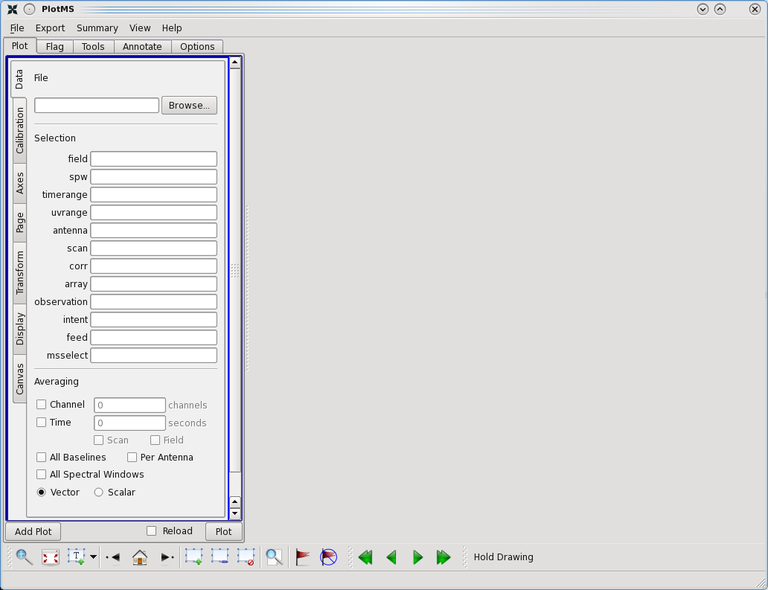

|         |                                                                                   |
|:--------|-----------------------------------------------------------------------------------|
| Type    | Figure 1                                                                          |
| ID      |                                                                                   |
| Caption | The plotms window starts on the *Plot \> Data* tab.  No parameters have been set. |

### <span style="font-size: 12pt;">1.1.1 File Selection</span>

<span style="font-size: 12pt;">When **plotms** is first started, by
default it will display the *Plot* tab (as chosen from the tabs at the
top of the **plotms** window) and its *Data* subtab (as chosen from the
tabs on the left side) as shown in Figure 1. First, a MeasurementSet or
calibration table should be loaded by clicking on *Browse* in the *File*
section and selecting a MeasurementSet directory (just select the
directory itself; do not descend into it).</span>

<span style="font-size: 12pt;">A plot can now be made of the
MeasurementSet by clicking on the *Plot* button, but you may want to set
selection or averaging parameters first rather than plot the entire
dataset.  By default, **plotms** will plot Amplitude versus Time for a
MeasurementSet; see this <span style="color: #000000;">section on
[selecting axes](#1-3-1-selecting-axes) </span>for axis options.  The
default axes change for calibration tables depending on the table type. 
**plotms** self-scales axes and the symbol size. For a very large range,
this can hide points close to zero; see the <span
style="color: #0000ff;"><span style="color: #000000;">sections
below</span></span> for information on setting [axes
ranges](#1-3-4-axes-ranges) and [symbol
sizes](#1-6-2-customizing-your-symbols).</span>

<span style="font-size: 12pt;">The **plotms** task parameter for file
selection is *vis.*</span>

###  <span style="font-size: 12pt;">1.1.2 Data Selection</span>

<span style="font-size: 12pt;">The options for data selection
are:</span>

-   <span style="font-size: 12pt;">field</span>
-   <span style="font-size: 12pt;">spw</span>
-   <span style="font-size: 12pt;">timerange</span>
-   <span style="font-size: 12pt;">uvrange</span>
-   <span style="font-size: 12pt;">antenna</span>
-   <span style="font-size: 12pt;">scan</span>
-   <span style="font-size: 12pt;">corr (correlated
    polarizations)</span>
-   <span style="font-size: 12pt;">array</span>
-   <span style="font-size: 12pt;">observation</span>
-   <span style="font-size: 12pt;">intent</span>
-   <span style="font-size: 12pt;">feed</span>
-   <span style="font-size: 12pt;">msselect</span>

<span style="font-size: 12pt;">Note that, unlike when setting data
selection parameters from the CASA command line, no quotation marks are
needed around strings in the GUI.  For more information on data
selection strings, see the documentation
[here](https://casa.nrao.edu/casadocs-devel/stable/calibration-and-visibility-data/data-selection-in-a-measurementset). 
To view information about your data in order to make your selection, see
the [<span
style="color: #000000;">Summary</span>](#5-3-summary-menu--information-about-your-dataset)
section below or use the listobs task.</span>

<span style="font-size: 12pt;">Calibration table selection differs from
MeasurementSet selection.  The *antenna* selection selects baselines
which contain the selected antennas in MeasurementSets, but selects
antenna1 only for calibration tables.  Spectral window selection (*spw*)
is used to select spw only (channel selection is ignored) in calibration
tables.  *corr* may be used to select cal table polarizations, including
"/" for a ratio plot.  
</span>

<span style="font-size: 12pt;">The **plotms** parameter for data
selection is *selectdata* (default is True, but no selection occurs
unless one or more subparameters is set).  Its subparameters include
*field, spw, timerange. uvrange, antenna, scan, correlation, array,
observation, intent, feed,* and *msselect.*  These should be set to
string values.</span>

### <span style="font-size: 12pt;">1.1.3 Averaging Data</span>

<span style="font-size: 12pt;">**plotms** enables averaging of the data
in order to increase signal-to-noise of the plotted points or to
increase plotting speed.  Averaging is currently not supported
for</span>

-   <span style="font-size: 12pt;">calibration tables</span>
-   <span style="font-size: 12pt;">*Ant-Ra*, Ant*-Dec* axes  
    </span>

<span style="font-size: 12pt;">and will result in a warning in the log,
then the unaveraged data will be plotted.  
</span>

<span style="font-size: 12pt;">The options for averaging in the *Plot \>
Data* tab include:</span>

-   <span style="font-size: 12pt;">channel</span>
-   <span style="font-size: 12pt;">time (optionally over scans or
    fields)  
    </span>
-   <span style="font-size: 12pt;">all baselines or per antenna</span>
-   <span style="font-size: 12pt;">all spectral windows</span>
-   <span style="font-size: 12pt;">vector (default) or scalar</span>

<span style="font-size: 12pt;">The box next to a given averaging mode
needs to be checked for that averaging to take effect.  The Weight and
Sigma axes are not supported in some averaging modes.  Note that the
"average weight" is actually the weight *sum* accumulated when
performing the average; i.e., the net weight of a weighted-averaged
datum is the sum of the weights going into the average.  
</span>

<span style="font-size: 12pt;">When averaging, **plotms** will prefer
unflagged data.  If an averaging bin contains any unflagged data at all,
only the average of the unflagged will be shown. For averaging bins that
contain *only* unflagged data, the average of that unflagged data will
be shown. When flagging on a plot of averaged data, the flags will be
applied to the unaveraged data in the MS.</span>

<span style="font-size: 12pt;">The **plotms** task parameter for
averaging is *averagedata* (default is True, but no averaging occurs
unless one or more subparameters are set).  It subparameters include
*avgchannel* and *avgtime* (set to a string value in channels or
seconds, default ""), and boolean parameters *avgscan, avgfield,
avgbaseline, avgantenna, avgspw, and scalar* (True/False, default
False).  Invalid combinations of averaging will result in an error
message (e.g. *avgbaseline=True, avgantenna=True)* or will be ignored
(e.g. *avgscan=True* but *avgtime* has not been set).</span>

#### <span style="font-size: 12pt;"><span style="text-decoration: underline;">Channel Averaging:</span></span>

<span style="font-size: 12pt;">For example, to average <span
style="font-style: italic;">n</span> channels together, the user would
click on the box next to *Channel* so that an “X” appears in it, and
then type the number <span style="font-style: italic;">n</span> in the
empty box. When the user next clicks on *Plot*, every <span
style="font-style: italic;">n</span> channels will then be averaged
together and plotted against the average channel numbers. The total
number of channels plotted will be decreased by a factor of <span
style="font-style: italic;">n</span>.</span>

<span style="font-size: 12pt;">Warning: If a complex channel selection
is made e.g. of continuum in the presense of multiple lines, channel
averaging is unlikely to produce a meaningful plot.</span>

#### <span style="text-decoration: underline; font-size: 12pt;">Time Averaging:</span>

<span style="font-size: 12pt;">Time averaging is a little trickier, as
it is controlled by three fields. If the checkbox next to *Time* is
checked, a blank box with units of seconds will become active, along
with two additional checkboxes: *Scan* and *Field*. If averaging is
desired over a relatively short interval (say, 30 seconds, shorter than
the scan length), a number can simply be entered into the blank box and,
when the data are replotted, the data will be time averaged. Clicking on
the *Scan* or *Field* checkbox in this case will have no impact on the
time averaging.  These checkboxes become relevant if averaging over a
relatively long time—say the entire observation, which consists of
multiple scans—is desired. Regardless of how large a number is set in
the *Time* averaging box, only data within individual scans will be
averaged together. In order to average data across scan boundaries, the
*Scan* checkbox must be checked and the data replotted. Finally,
clicking on the *Field* checkbox enables the averaging of multiple
fields together in time.</span>

#### <span style="text-decoration: underline; font-size: 12pt;">Averaging All Baselines/Per Antenna:</span>

<span style="font-size: 12pt;">Clicking on the *All Baselines* checkbox
will average all baselines in the array together. Alternatively, the
*Per Antenna* box may be checked, which will average all baselines for a
given antenna together. In this case, all baselines are represented
twice; baseline 3-24 will contribute to the averages for both antenna 3
and antenna 24. This can produce some rather strange-looking plots if
the user also selects on antenna—say, if the user requests to plot only
antenna 0 and then averages *Per Antenna*, In this case, an average of
all baselines including antenna 0 will be plotted, but each individual
baseline including antenna 0 will also be plotted (because the presence
of baselines 0-1, 0-2, 0-3, etc. trigger *Per Antenna* averaging to
compute averages for antennae 1, 2, 3, etc. Therefore, baseline 0-1 will
contribute to the average for antenna 0, but it will also singlehandedly
<span style="font-style: italic;">be</span> the average for antenna 1.) 
These averaging modes currently do not support the Weight and Sigma
axes.  
</span>

#### <span style="text-decoration: underline; font-size: 12pt;">Averaging All Spectral Windows:</span>

<span style="font-size: 12pt;">Spectral windows can be averaged together
by checking the box next to *All Spectral Windows*. This will result in,
for a given channel <span style="font-style: italic;">n</span>, all
channels <span style="font-style: italic;">n</span> from the individual
spectral windows being averaged together.  This averaging mode currently
does not support the Weight and Sigma axes.  
</span>

#### <span style="text-decoration: underline; font-size: 12pt;">Vector/Scalar Averaging:</span>

<span style="font-size: 12pt;">Finally, the default mode is vector
averaging, where the complex average is formed by averaging the real and
imaginary parts of the relevant visibilities. If *Scalar* is chosen,
then the amplitude of the average is formed by a scalar average of the
individual visibility amplitudes.</span>

### <span style="font-size: 12pt;">1.1.4 A Brief Note Regarding plotms Memory Usage</span>

<span style="font-size: 12pt;">In order to provide a wide range of
flexible interactive plotting options while minimizing the I/O burden
and speeding up the plotting, **plotms** caches the data values for the
plot (along with a subset of relevant meta-info) in as efficient a
manner as possible.  Sometimes, however, the data changes on disk, for
example when other data processing tasks are applied. To force plotms to
reload the data, check the *Reload* box next to the *Plot* button or
press the SHIFT key while clicking the *Plot* button.</span>

<span style="font-size: 12pt;">For plots of large numbers of points, the
total memory requirement can be quite large. **plotms** attempts to
predict the memory it will require (typically 5 or 6 bytes per plotted
point when only one axis is a data axis, depending upon the data shapes
involved), and will complain if it believes there is insufficient memory
to support the requested plot. For most practical interactive purposes
(plots that load and draw in less than a few or a few 10s of minutes),
there is usually not a problem on typical modern workstations.  Attempts
to plot large datasets on small laptops might be more likely to
encounter problems here.</span>

<span style="font-size: 12pt;">The absolute upper limit on the number of
simultaneously plotted points is currently set by the ability to index
the points in the cache. For modern 64 bit machines, this is about 4.29
billion points (requiring around 25GB of memory). Such plots are not
especially useful interactively, since the I/O and draw become
prohibitive.</span>  
  
<span style="font-size: 12pt;">In general, it is usually most efficient
to plot data in modest chunks of no more than a few hundred million
points or less, either using selection or averaging. Note that all
iterations are (currently) cached simultaneously for iterated plots, so
iteration is not a way to manage memory use. A few hundred million
points tends to be the practical limit of interactive **plotms** use
with respect to information content and utility in the resulting plots,
especially when you consider the number of available pixels on your
screen.</span>  
  

------------------------------------------------------------------------

## <span style="font-size: 14pt;">1.2 On-The-Fly Calibration: the Plot Calibration Tab</span>

<span
style="font-size: 12pt;">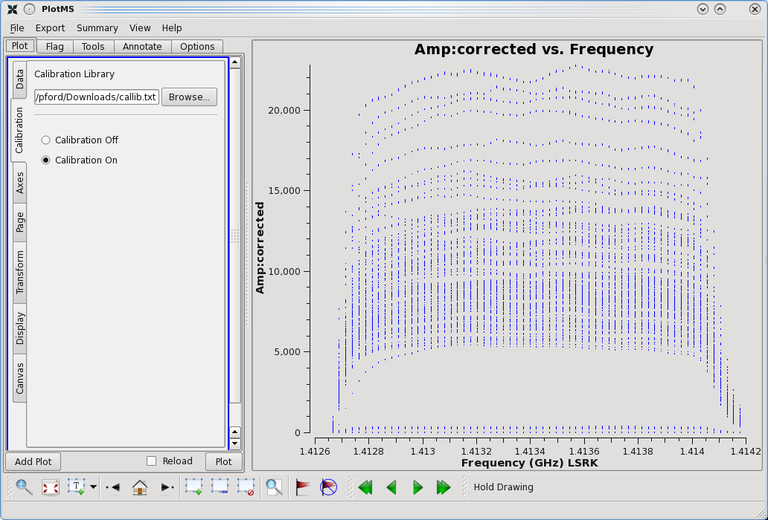</span>

|         |                                                                                                                                                                        |
|:--------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Type    | Figure 2                                                                                                                                                               |
| ID      |                                                                                                                                                                        |
| Caption | The plotms Calibration tab.  This MeasurementSet has no *CORRECTED_DATA* column. A calibration library file was selected with the file browser and applied on the fly. |

<span style="font-size: 12pt;">One can apply calibration tables to the
uncalibrated data on the fly, i.e. without a run of applycal beforehand,
by specifying a calibration library and selecting the *corrected* Data
Column for the plotted axes.  See the [Cal Library
Syntax](https://casa.nrao.edu/casadocs-devel/stable/calibration-and-visibility-data/cal-library-syntax)
documentation for more information on specifying calibration in a string
or file.  
</span>

<span style="font-size: 12pt;">The *Calibration* tab on the left hand
side contains a field to specify a calibration library file, or use
*Browse* to open a file selection dialog.  You can also specify the
calibration library commands directly in a string.  There is a switch to
apply the calibration library to produce the corrected data
(*Calibration On*) or to show an existing *CORRECTED_DATA* column
(*Calibration Off*).  If the *corrected* Data Column is requested but
the column is not present in the MS and the calibration library is not
set or enabled, **plotms** issues a warning and plots the *DATA* column
instead.  
</span>

<span style="font-size: 10pt;"><span style="font-size: 12pt;">The
**plotms** task parameter *’callib’* can be used to provide a
calibration library file or a string containing the cal library
commands.  It is enabled by default when the parameter is set.</span>  
</span>

------------------------------------------------------------------------

## <span style="font-size: 12pt;"><span style="font-size: 14pt;">1.3 Selecting Plot Axes: The Plot Axes Tab</span> </span>

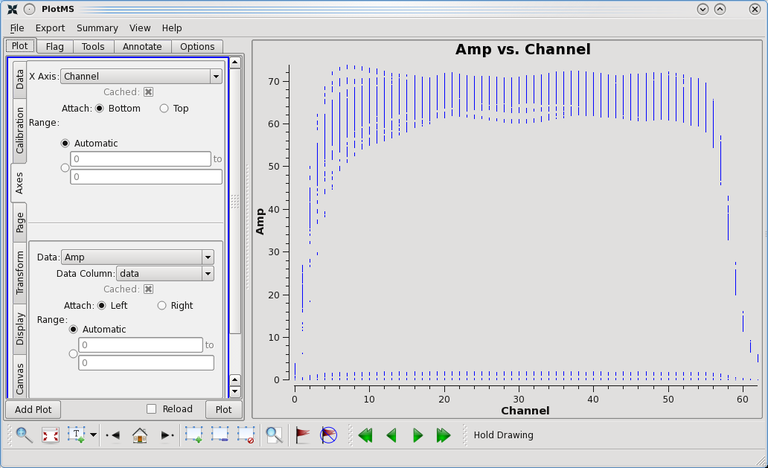

 

|         |                                                                                                                                                                                                         |
|:--------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Type    | Figure 3                                                                                                                                                                                                |
| ID      |                                                                                                                                                                                                         |
| Caption | <span style="font-size: 10pt;">The plotms *Plot* *\> Axes* tab, used here to make a plot of <span style="font-weight: bold;">Amp</span> **vs.** <span style="font-weight: bold;">Channel</span>.</span> |

------------------------------------------------------------------------

### <span id="1-3-1-selecting-axes"></span><span style="font-size: 12pt;">1.3.1 Selecting Axes</span>

<span style="font-size: 12pt;">The X and Y axes of a plot are selected
by clicking on the *Plot \> Axes* tab and choosing an entry from the
drop-down menus below *X Axis* and *Y Axis*. The axes are grouped by
type and listed in this order:</span>

-   <span style="font-size: 12pt;">**MeasurementSet metadata:**</span>
    -   <span style="font-size: 12pt;">**Scan** — The scan number, as
        listed by listobs or the **plotms** summary</span>
    -   <span style="font-size: 12pt;">**Field —** The field number, as
        listed by listobs or the **plotms** summary</span>
    -   <span style="font-size: 12pt;">**Time —**The time at which the
        visibility was observed, given in terms of calendar year
        (yyyy/mm/dd/hh:mm:ss.s).</span>
    -   <span style="font-size: 12pt;">**Interval —** The integration
        time in seconds.</span>
    -   <span style="font-size: 12pt;">**Spw** — The spectral window
        number. The characteristics of each spectral window are listed
        in listobs or the **plotms** summary.</span>
    -   <span style="font-size: 12pt;">**Channel** — The spectral
        channel number.</span>
    -   <span style="font-size: 12pt;">**Frequency** — Frequency in
        units of GHz. The frame for the frequency (e.g., topocentric,
        barycentric, LSRK) can be set in the Plots \> Transform
        tab.</span>
    -   <span style="font-size: 12pt;">**Velocity** — Velocity in units
        of km s−1, as defined by the Frame, Velocity Defn, and Rest Freq
        parameters in the Plots \> Transform tab.</span>
    -   <span style="font-size: 12pt;">**Corr** — Correlations which
        have been assigned integer IDs, including RR (5), RL (6), LR
        (7), LL (8), XX (9), XY (10), YX (11), and YY (12).  The axis
        values are these IDs, as listed by listobs or the **plotms**
        summary.  
        </span>
    -   <span style="font-size: 12pt;">**Antenna1** — The first antenna
        in a baseline pair; for example, for baseline 2-4, Antenna1= 2.
        Antennae are numbered according to the antenna IDs listed in
        listobs or the **plotms** summary.</span>
    -   <span style="font-size: 12pt;">**Antenna2** — The second antenna
        in a baseline pair; for baseline 2-4, Antenna2 = 4. Antennae are
        numbered according to the antenna IDs listed in listobs or the
        **plotms** summary.</span>
    -   <span style="font-size: 12pt;">**Antenna** — Antenna ID for
        plotting antenna-based quantities. Antennae are numbered
        according to the antenna IDs listed in listobs or the **plotms**
        summary.</span>
    -   <span style="font-size: 12pt;">**Baseline** — The baseline
        number.</span>
    -   <span style="font-size: 12pt;">**Row** — The MS data row number.
        A row number corresponds to a unique timestamp, baseline, and
        spectral window in the MeasurementSet.</span>
    -   <span style="font-size: 12pt;">**Observation —** The observation
        ID (index)</span>
    -   <span style="font-size: 12pt;">**Intent** — The intent ID
        (index)</span>
    -   <span style="font-size: 12pt;">**Feed1** — The first feed
        number, most useful for single-dish data.  
        </span>
    -   <span style="font-size: 12pt;">**Feed2** — The second feed
        number, most useful for single-dish data.</span>
-   <span style="font-size: 12pt;">**Visibility values and
    flags:**</span>
    -   <span style="font-size: 12pt;">**Amp** — Data amplitudes in
        units which are proportional to Jansky (for data which are fully
        calibrated, the units should be in Jy).</span>
    -   <span style="font-size: 12pt;">**Phase** — Data phases in units
        of degrees.</span>
    -   <span style="font-size: 12pt;">**Real** and **Imag** — The real
        and imaginary parts of the visibility in units which are
        proportional to Jansky (for data which are fully calibrated, the
        units should be Jy).</span>
    -   <span style="font-size: 12pt;">**Wt and **Wt\*Amp**** — the
        weight of the visibility and the product of the weight and the
        amplitude.</span>
    -   <span style="font-size: 12pt;">**WtSp** — WEIGHT_SPECTRUM
        column, i.e. a weight per channel.</span>
    -   <span style="font-size: 12pt;">**Sigma** — the SIGMA column of
        the visibilities</span>
    -   <span style="font-size: 12pt;">**SigmaSp** — SIGMA_SPECTRUM
        column, i.e. a sigma per channel</span>
    -   <span style="font-size: 12pt;">**Flag** — Data which are flagged
        have Flag = 1, whereas unflagged data are set to Flag = 0.  Note
        that, to display flagged data, you will have to click on the
        Plots \> Display tab and choose a Flagged Points Symbol.</span>
    -   <span style="font-size: 12pt;">**FlagRow** — In some tasks, if a
        whole data row is flagged, then FlagRow will be set to 1 for
        that row. Unflagged rows have FlagRow = 0. However, note that
        some tasks (like **plotms**) may flag a row, but not set FlagRow
        = 1. It is probably better to plot Flag than FlagRow for most
        applications.</span>
-   <span style="font-size: 12pt;">**Observational geometry:**</span>
    -   <span style="font-size: 12pt;">**UVdist** — Projected baseline
        separations in units of meters. Note that UVDist is not a
        function of frequency.</span>

    -   <span style="font-size: 12pt;">**UVwave —** Projected baseline
        separations in units of the observing wavelength (lambda, not
        kilolambda). UVwave is a function of frequency, and therefore,
        there will be a different data point for each frequency
        channel.</span>

    -   <span style="font-size: 12pt;">**U, **V**,** and ****W** —** u,
        v, and w in units of meters.</span>

    -   <span style="font-size: 12pt;">**Uwave**, **Vwave**, and
        **Wwave** — u, v, and w in units of wavelengths lambda.</span>

    -   <span style="font-size: 12pt;">**Azimuth** and **Ant-Azimuth** —
        Azimuth in units of degrees. Azimuth plots a fiducial value for
        the entire array, while Ant-Azimuth plots the azimuth for each
        individual antenna (their azimuths will differ depending on each
        antenna's longitude, latitude, and elevation).</span>

    -   <span style="font-size: 12pt;">**Elevation** and
        **Ant-Elevation** — Elevation in units of degrees. Elevation is
        a representative value for the entire array, while Ant-Elevation
        is the elevation for each individual antenna (their elevations
        will differ depending on each antenna's longitude, latitude, and
        elevation).</span>

    -   <span style="font-size: 12pt;">**Ant-Ra** and **Ant-Dec** —
        Longitude and latitude of the direction to which the first
        antenna of a baseline points at data-taking timestamps.  
        </span>

    -   <span style="font-size: 12pt;">**HourAngle** — Hour angle in
        units of hours. This is a fiducial value for the entire
        array.</span>

    -   <span style="font-size: 12pt;">**ParAngle** and **Ant-ParAng** —
        Parallactic angle in units of degrees. ParAngle is the fiducial
        parallactic angle for all antennae in the array, while
        Ant-ParAng plots the parallactic angle for each individual
        antenna (their parallactic angles will differ depending on each
        antenna's longitude, latitude, and elevation).</span>
-   <span style="font-size: 12pt;">**Calibration:**</span>
    -   <span style="font-size: 12pt;">**GainAmp, **GainPhase**,
        **GainReal**, **GainImag**** — the amplitude, phase, real and
        imaginary part of the calibration tables for regular complex
        gain tables.</span>
    -   <span style="font-size: 12pt;">**Delay** — The delay of a delay
        calibration table.</span>
    -   <span style="font-size: 12pt;">**SwPower** — Switched Power
        values for VLA switched power calibration tables.</span>
    -   <span style="font-size: 12pt;">**Tsys** — Tsys for Tsys
        calibration tables.</span>
    -   <span style="font-size: 12pt;">**Opac** — Opacity values of a
        Opacity calibration table.</span>
    -   <span style="font-size: 12pt;">**SNR** — Signal-to-Noise Ratio
        of a calibration table.</span>
    -   <span style="font-size: 12pt;">**TEC** — Total Electron Content
        of an ionosphere correction calibration table.</span>
-   **<span style="font-size: 12pt;">Ephemeris:</span>**
    -   **<span style="font-size: 12pt;">Radial Velocity</span>**<span
        style="font-size: 12pt;"> — </span><span
        style="font-size: 12pt;">for an ephemeris source, in
        km/s.</span>
    -   **<span style="font-size: 12pt;">Distance (rho)</span>**<span
        style="font-size: 12pt;"> — </span><span
        style="font-size: 12pt;"><span style="font-size: 12pt;">for an
        ephemeris source, in km.</span></span>
-   

<span style="font-size: 12pt;">If the data axis selected from the
drop-down menu is already stored in the cache (therefore implying that
plotting will proceed relatively quickly), an “X” will appear in the
checkbox next to *Cached*.   To reload the data from disk, the *Reload*
checkmark should be set at the bottom of this display.</span>

<span style="font-size: 12pt;">The **plotms** task parameters used to
select the axes are *xaxis* and *yaxis*.  Valid options include 'scan',
'field', 'time', 'interval', 'spw', 'chan' (or 'channel'), 'freq' (or
'frequency'), 'vel' (or 'velocity'), 'corr' (or 'correlation), 'ant1'
(or 'antenna1'), 'ant2' (or 'antenna2'), 'baseline', 'row',
'observation', 'intent', 'feed1', 'feed2', 'amp' (or 'amplitude'),
'phase', 'real', 'imag', 'wt' (or 'weight'), 'wtsp' (or
'weightspectrum'), 'flag', 'flagrow', 'uvdist', 'uvwave' (or 'uvdistl'),
'u', 'v', 'w', 'uwave', 'vwave', 'wwave', 'azimuth', 'elevation',
'hourang' (or 'hourangle'), 'parang' (or 'parangle'), 'ant' (or
'antenna'), 'ant-azimuth', 'ant-elevation', 'ant-ra', 'ant-dec',
'ant-parang' (or 'ant-parangle'), 'gainamp' (or 'gamp'), 'gainphase' (or
'gphase'), 'gainreal' (or 'greal'), 'gainimag' (or 'gimag'), 'delay' (or
'del'), 'swpower' (or 'swp' or 'spgain'), 'tsys', 'opacity' (or 'opac'),
'snr', 'tec', 'radialvelocity', 'distance' (or 'rho').</span>

<span style="font-size: 12pt;">When left as the default empty strings
(""), the axes for a MeasurementSet will be Amp vs. Time.  The default
axes for a calibration table depend on the type.  
</span>

### <span style="font-size: 12pt;">1.3.2 Setting Axes Parameters</span>

#### <span style="font-size: 12pt;">1.3.2.1 Data Columns</span>

<span style="font-size: 12pt;">For relevant data axes like Amp and
Phase, the user will be presented with the option to plot raw data or
calibrated data. This can be selected via a *Data Column* drop-down
menu, located directly under the drop-down menu for *X Axis* or *Y Axis*
selection. To plot raw data, select “data”; to plot calibrated data,
select “corrected”. Note that this choice will only have an impact on a
plot if a calibration table has been applied to the MeasurementSet or a
calibration library is set and enabled.  
</span>

<span style="font-size: 12pt;">If a data model is present in the
MeasurementSet (e.g., created by setjy, clean, or ft), it can be plotted
by selecting “model” from the *Data Column* menu. For MeasurementSets
with float data instead of complex data, common in singledish datasets,
select the "float" datacolumn.</span>

<span style="font-size: 12pt;">Residuals can be plotted via
"corrected-model_vector", "corrected-model_scalar", "data-model_vector",
data-model_scalar", "corrected/model_vector", "corrected/model_scalar",
"data/model_vector", and "data/model_scalar".  The vector and scalar
options distinguish between versions where values like amp, phase, etc.
are calculated before (scalar) or after (vector) the subtraction or
division.  
</span>

<span style="font-size: 12pt;">The **plotms** task parameters used to
select the data columns are *xdatacolumn* and *ydatacolumn*.  Valid
options include 'data', corrected', 'model', 'float', 'corrected-model'
(vector implied), 'corrected-model_vector', 'corrected-model_scalar',
'data-model' (vector implied), 'data-model_vector', 'data-model_scalar',
'corrected/model' (vector implied), 'corrected/model_vector',
'corrected/model_scalar', 'data/model' (vector implied),
'data/model_vector', and 'data/model_scalar'.  The implied vector
residual datacolumns were kept for backwards compatibility.  Default
data columns for x and y are both 'data'.  
</span>

#### <span style="font-size: 12pt;">1.3.2.2 Antenna Pointing Direction Parameters </span>

<span style="font-size: 12pt;">Ant-Ra, Ant-Dec axes are the longitude
and the latitude of the direction to which the first antenna of a
baseline points at data-taking timestamps. Their value is computed by  
</span>

-   <span style="font-size: 12pt;">interpolating with a user-supplied
    method the direction of that antenna at that data-taking timestamp,
    from the known directions pointed by that antenna at
    pointing-direction-recording timestamps, recorded in
    MeasurementSet's POINTING table</span>
-   <span style="font-size: 12pt;">converting the result to a
    user-specified output reference frame  
    </span>

<span style="font-size: 12pt;">The **plotms** task parameters to set
ant-ra and ant-dec axes parameters are:  
</span>

-   <span style="font-size: 12pt;">xinterp: interpolation method to use
    when xaxis='ant-ra' or xaxis='ant-dec'</span>
-   <span style="font-size: 12pt;">xframe: output reference frame to use
    when xaxis='ant-ra' or xaxis='ant-dec'</span>
-   <span style="font-size: 12pt;">yinterp: interpolation method to use
    when yaxis='ant-ra' or yaxis='ant-dec'</span>
-   <span style="font-size: 12pt;">yframe: output reference frame to use
    when yaxis='ant-ra' or yaxis='ant-dec'</span>

<span style="font-size: 12pt;">Valid values for xframe and yframe are:
'icrs', 'j2000', 'b1950', 'galactic', 'azelgeo' (default "" == 'icrs')
</span>

<span style="font-size: 12pt;">Valid values for xinterp and yinterp are:
'nearest', 'cubic spline', 'spline' (default "" == 'cubic spline')
</span>

<span style="font-size: 12pt;">Note:</span>

-   <span style="font-size: 12pt;">'spline' is a synonym for 'cubic
    spline'</span>
-   <span style="font-size: 12pt;">when the interpolation method is set
    to 'nearest', reference frame conversion is performed at the nearest
    pointing-recording timestamp, not at the data-taking
    timestamp</span>

<span style="font-size: 12pt;"><span
style="font-weight: bold;">WARNING:</span> plotting antennas pointing
directions with the Ant-Ra / Ant-Dec axes has only been implemented for
ALMA, ASTE, and NRO data.</span>

 

### <span style="font-size: 12pt;">1.3.3 Axis Locations</span>

<span style="font-size: 12pt;">The location of the x-axis and y-axis can
be set using the radio buttons in the GUI, where the x-axis can be
located at the *Bottom* (default) or *Top*, and the y-axis can be
located at the *Left* (default) or *Right.*</span>

<span style="font-size: 12pt;">The **plotms** task parameter to set the
y-axis location is *yaxislocation. * There is no parameter to set the
x-axis location.  Valid values for this parameter include 'left' and
'right' (default "" == 'left').  
</span>

### <span id="1-3-4-axes-ranges"></span><span style="font-size: 12pt;">1.3.4 Axes Ranges</span>

<span style="font-size: 12pt;">The X and Y ranges of the plot can be set
manually or automatically. By default, the circle next to *Automatic*
will be checked, and the ranges will be auto-scaled. To define the
range, click on the circle below *Automatic* and enter a minimum and
maximum value in the blank boxes. Note that if identical values are
placed in the blank boxes (<span
style="font-style: italic;">xmin=xmax</span> and/or <span
style="font-style: italic;">ymin=ymax</span>), then the values will be
ignored and a best guess will be made to auto-range that axis.</span>

<span style="font-size: 12pt;">The **plotms** task parameter used to set
the axes ranges is *plotrange*, and its value is a list of numbers in
the format \[xmin, xmax, ymin, ymax\] (default \[ \], automatic
range).  
</span>

### <span style="font-size: 12pt;">1.3.5 Plotting Multiple Y-Axes</span>

<span style="font-size: 10pt;"><span style="font-size: 12pt;">Different
values of the same dataset can be shown at the same time. To add a
second y-axis, press the *Add Y Axis Data* button at the bottom of the
*Axes* tab. Then select the parameters for the newly created axis by
selecting from the new “Y Axis Data” drop-down menu. If the two y-axes
have the same units, they can be displayed both on the same axis. If
they are different (or their ranges are dissimilar), e.g. Amplitude and
Elevation (both versus Time; see Figure 4 below), one axis should be
attached to the left and the other to the right hand side of the plot.
Using more than a single y-axis data is also reflected in the *Display*
tab where a drop-down menu appears in order to select multiple y-axis
options; here you may colorize each axis differently.  See the <span
style="color: #ff0000;"><span style="color: #000000;">section
below</span><span style="color: #808080;"><span style="color: #000000;">
to learn more about [symbol
properties](#1-6-2-customizing-your-symbols)</span><span
style="color: #000000;">.</span></span></span> To remove the additional
y-axis, click *Delete Y Axis Data* at the bottom of the *Axes*
tab.</span>  
</span>

<span style="font-size: 10pt;"><span
style="font-size: medium;">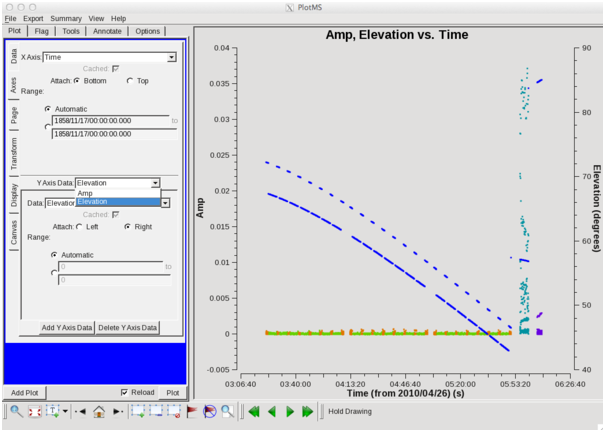</span></span>

|         |                                                                                                                                                                  |
|:--------|------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Type    | Figure 4                                                                                                                                                         |
| ID      |                                                                                                                                                                  |
| Caption | <span style="font-size: 12pt;">Overplotting in plotms: Two different y-axes for the same dataset have been chosen for this plot, amplitude and elevation.</span> |

<span style="font-size: 10pt;"><span style="font-size: 12pt;">The
**plotms** task parameters used to plot multiple y-axes are the same as
for a single y-axis: *yaxis* and *yaxislocation*; multiple y-axes can be
specified as a list of strings if you are specifying the **plotms**
command in the terminal. The values for *yaxis* and
*yaxislocation* should be set to lists of the same length:</span>  
</span>

<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">plotms(vis='ngc5921.ms',
yaxis=\['amp','elevation'\], yaxislocation=\['left','right'\])</span>

### <span style="font-size: 12pt;">1.3.6 Atmospheric Curve Overlays </span>

<span style="font-size: 12pt;">The ability to compute and overlay an
atmospheric transmission curve or a sky temperature curve, available in
plotbandpass, has been added to **plotms**.  For this feature, the
x-axis must be Channel or Frequency; if another axis is chosen, a
warning is issued and the plot continues without the overlay.  
</span>

<span style="font-size: 12pt;">**plotms** uses the dataset's subtables
to compute the mean weather values: pressure, humidity, temperature, and
precipitable water vapor (pwv).  If these subtables are not found,
reasonable defaults are used instead and reported in a log message.  The
[atmosphere
tool](https://casa.nrao.edu/casadocs-devel/stable/global-tool-list/tool_atmosphere)
is then used by **plotms** to calculate dry and wet opacities to produce
the requested overlay curve, corrected by the airmass based on
elevation.</span>

<span
style="font-size: 12pt;">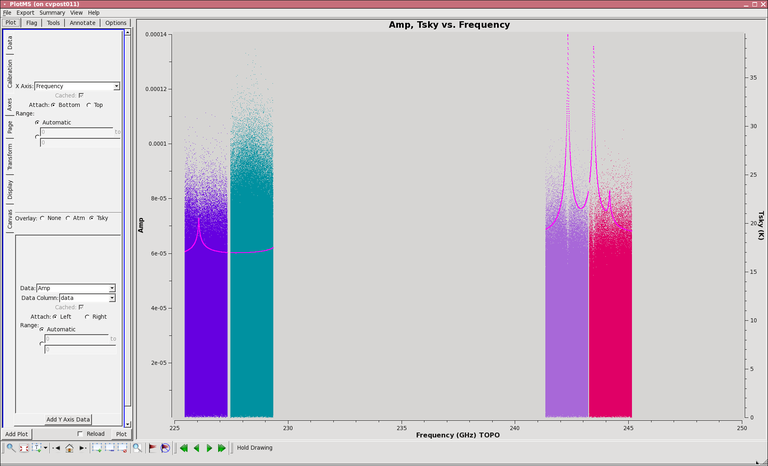</span>

|         |                                                                                                                                                                                                                                 |
|:--------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Type    | Figure 5                                                                                                                                                                                                                        |
| ID      |                                                                                                                                                                                                                                 |
| Caption | Amp vs. Frequency plot with a Tsky overlay.  The Tsky y-axis is automatically added on the right, and the curve is plotted in magenta.  The Plot \> Axes tab shows the radio buttons to select the Overlay: None, Atm, or Tsky. |

<span style="font-size: 12pt;">The **plotms** task parameters used to
plot the overlays are *showatm* and *showtsky*.  These take boolean
values and their defaults are False.  Only one overlay can be selected;
if both are set to True, only the atmospheric curve (*showatm*) will be
displayed.</span>

<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">plotms(vis=myvis,
yaxis='amp', xaxis='freq', showatm=True)</span>

<span style="font-size: 12pt;">The image sideband curve may also be
shown in **plotms** when the atmospheric transmission or sky temperature
curves are plotted.  In order to do this, the MS (or associated MS for a
calibration table) cannot have reindexed spectral window IDs as a result
of a split, and must have an ASDM_RECEIVER table in order to read the LO
frequencies.  If these conditions are not met, a warning is issued and
only the atm/tsky curves are calculated and plotted.</span>

<span
style="font-size: 12pt;">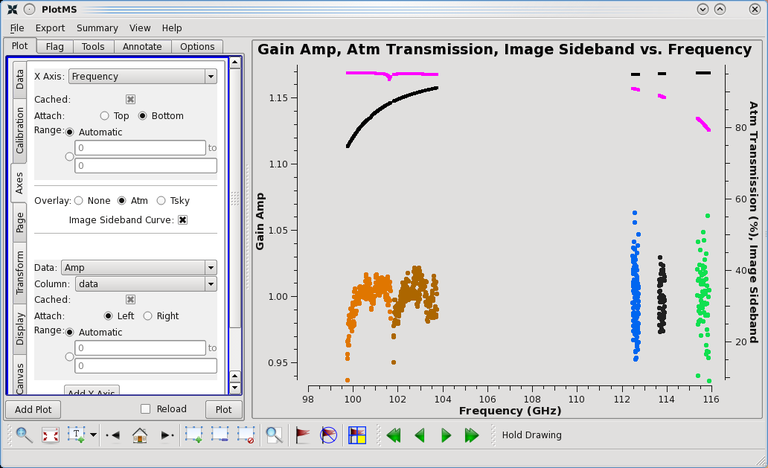</span>

|         |                                                                                                                                                                                                                                                                                                             |
|:--------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Type    | Figure 5b                                                                                                                                                                                                                                                                                                   |
| ID      |                                                                                                                                                                                                                                                                                                             |
| Caption | Gain Amp vs. Frequency plot for a bandpass calibration table with the Atm Transmission (magenta) and Image Sideband (black) overlays, colorized by spw and one antenna selected.  The Plot \> Axes tab shows the checkbox to select the image sideband curve, enabled only when the Overlay is Atm or Tsky. |

<span style="font-size: 12pt;">The **plotms** task parameter used to
plot the image sideband curve overlay is *showimage*.  This takes a
boolean value and its default is False.  If *showatm=False* and
*showtsky=False*, a warning is issued and the curve will not be
calculated and plotted.</span>

<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">plotms(vis=mycaltable,
yaxis='amp', xaxis='freq', antenna='0', coloraxis='spw', showatm=True,
showimage=True)</span>

------------------------------------------------------------------------

## <span id="1-4-iteration--the-plot-page-tab"></span><span style="font-size: 14pt;">1.4 Iteration and Page Header : The Plot Page Tab</span>

###  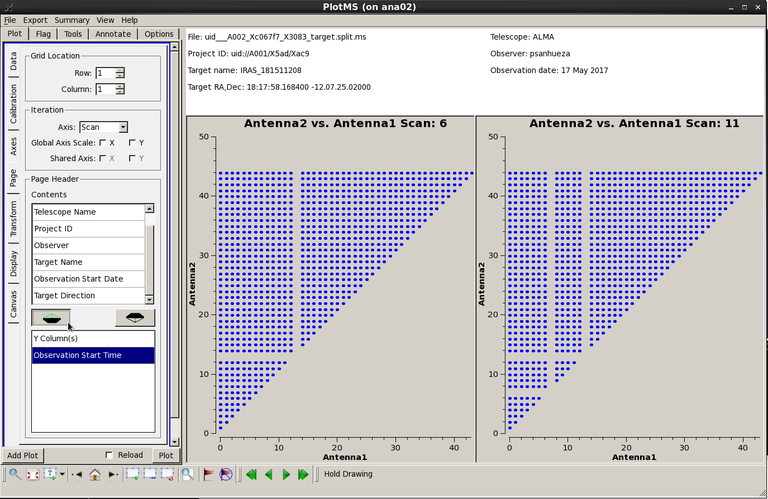

|         |                  |
|:--------|------------------|
| Type    | Figure 6         |
| ID      | plotms.plot.page |
| Caption | Plot Page Tab    |

### <span style="font-size: 12pt;">1.4.1 Iteration</span>

<span style="font-size: 12pt;">In many cases, it is desirable to iterate
through the data that were selected in the <span
style="font-style: italic;">Data</span> tab. A typical example is to
display a single baseline in an amplitude vs. time plot and then proceed
to the next baselines step by step. This can be done via the *Plot \>
Page* tab.  A drop-down menu allows you to select the axis to be
iterated on, with options *None, Scan, Field, Spw, Baseline, Antenna,
Time,* and *Corr*.  Press the *Plot* button after changing your
selection.  Each plot will be autoscaled according to its iteration
value range unless a *Range* is specified in the *Axis* tab.  
</span>

<span style="font-size: 12pt;">The current iteration is indicated in the
plot title of the displayed plot. To proceed to the next plot use the
<span style="font-style: italic;">green arrow buttons</span> below the
main panel. The different button symbols let you to proceed panel by
panel (single arrow symbols) or to jump to the first or last panel
directly (double arrow symbols).</span>

<span style="font-size: 12pt;">The number of plots per page can be
selected under *Options \> Grid*, the last of the top row of tabs, as
described in the section on [plotting on a
grid](#4-1-plotting-on-a-grid).  There are two scaling options for the
iterated axes in a grid, set in this tab: <span
style="font-style: italic;">Global</span> and <span
style="font-style: italic;">Shared</span>. <span
style="font-style: italic;">Global</span> will use a common axis range
based on data loaded with the selection criteria specified in the <span
style="font-style: italic;">Data</span> tab. <span
style="font-style: italic;">Shared </span>displays one set of x-axes and
y-axes for the page rather than per-plot.  When left
unchecked, *Global *and *Shared *results in plots with axes scaling to
the data for each individual panel of the iteration.  See Figure 9 in
[section 4.1.1](#4-1-1-plotting-iterations-on-a-grid) for an example of
global shared x-axes and y-axes.  
</span>

<span style="font-size: 12pt;">The **plotms** task parameter used to
select an iteration axis is *iteraxis*.  The options include 'scan',
'field', 'spw', 'baseline', 'antenna', 'time', and 'corr'.</span>

<span style="font-size: 12pt;">To use a global axis range for iterated
plots, set parameters *xselfscale=True* and/or *yselfscale=True*.  To
use a shared external x-axis per column on a grid, set
*xsharedaxis=True* (must also set *xselfscale=True* and *gridrows*
greater than 1).  To use a shared external y-axis per row on a grid, set
*ysharedaxis=True* (must also set *yselfscale=True* and *gridcols*
greater than 1).  
</span>

### <span style="font-size: 12pt;">1.4.2 Page Header</span>

<span style="font-size: 12pt;">It is sometimes useful to display above
the plots a page header showing some metadata information. To do so,
select in the lower list the header items you want to display, and press
the antenna-shaped "arrow" pointing up. This will move the items you
selected to the upper list showing the header contents, without updating
the page header. Press the Plot button to update the page header.</span>

<span style="font-size: 12pt;">Multiple items can be selected at once by
pressing the Shift or the Control key, Control+A selects all
items.</span>

<span style="font-size: 12pt;">Items displayed in the Contents list are
laid out on 2 columns in the page header, in "Z" order.</span>

<span style="font-size: 12pt;">To remove items from the Contents list,
select in that list the items to remove and press  the antenna-shaped
"arrow" pointing down.</span>

<span style="font-size: 12pt;">Antennas blink red when clicked while
their corresponding selection is empty, green otherwise.</span>

<span style="font-size: 12pt;">Header items from multiple plots can be
displayed in the page header. In that case items from the first plot are
laid out first, items from the second plot are then laid out starting
from the first empty row, and so on.</span>

<span style="font-size: 12pt;">The contents of the header is common to
all pages.</span>

<span style="font-size: 12pt;">The **plotms** task parameter used to
specify header items is *headeritems*. Legal value is a string whose
value can be any comma-separated combination of the following
pre-defined keywords: </span>

-   <span style="font-size: 12pt;">'filename',
    'projid','telescope','observer','obsdate','obstime','targname','targdir','ycolumn'</span>

<span style="font-size: 12pt;">When selected data leaves room for
multiple candidates (e.g when selected data spans multiple observations
or include multiple fields or sources), the first selected row in
MeasurementSet's Main table is used as a starting point for looking up a
single "first" candidate in  MeasurementSet's auxiliary tables.</span>

<span style="font-size: 12pt;">Observation Start Date and Observation
Start Time are looked up in MeasurementSet's Observation table, and
therefore differ from the output of listobs task.</span>

------------------------------------------------------------------------

## <span style="font-size: 14pt;">1.5 Transforming the Velocity Frame or Phase Center: The Plot Transform Tab </span>

### <span style="font-size: medium;">1.5.1 Frequency Frame</span>

<span style="font-size: medium;">If the user plans to plot f</span><span
style="font-size: medium;">requency</span><span
style="font-size: medium;">, the reference frame must be defined. By
default, **plotms** selects the frame keyword (if any) present in the
data, usually the frame observed at the telescope unless modified during
previous processing. However, transformations can be made by choosing a
</span>*<span style="font-size: medium;">Frame</span>*<span
style="font-size: medium;"> from the drop-down menu in the </span>*<span
style="font-size: medium;">Plot </span><span
style="font-size: medium;">\></span><span style="font-size: medium;">
Transform</span>*<span style="font-size: medium;"> tab. Frequency
reference frames can be chosen to be:</span>

-   <span style="font-size: medium;"><span
    style="font-weight: bold;">LSRK</span></span><span
    style="font-size: medium;"> — local standard of rest
    (kinematic)</span>
-   <span style="font-size: medium;"><span
    style="font-weight: bold;">LSRD</span></span><span
    style="font-size: medium;"> — local standard of rest
    (dynamic)</span>
-   <span style="font-size: medium;"><span
    style="font-weight: bold;">BARY</span></span><span
    style="font-size: medium;"> — barycentric</span>
-   <span style="font-size: medium;"><span
    style="font-weight: bold;">GEO</span></span><span
    style="font-size: medium;"> — geocentric</span>
-   <span style="font-size: medium;"><span
    style="font-weight: bold;">TOPO</span></span><span
    style="font-size: medium;"> — topocentric</span>
-   <span style="font-size: medium;"><span
    style="font-weight: bold;">GALACTO</span></span><span
    style="font-size: medium;"> — galactocentric</span>
-   <span style="font-size: medium;"><span
    style="font-weight: bold;">LGROUP</span></span><span
    style="font-size: medium;"> — local group</span>
-   <span style="font-size: medium;"><span
    style="font-weight: bold;">CMB</span></span><span
    style="font-size: medium;"> — cosmic microwave background
    dipole</span>

<span style="font-size: 12pt;">The **plotms** task parameter used to
select frequency frame is *freqframe.*  Valid options include those
listed above (strings with all caps).  The default empty string ""
results in no frame transformation.  
</span>

### <span style="font-size: 12pt;">1.5.2 Velocity</span>

<span style="font-size: medium;">If Velocity is selected as an axis, by
default the transformation from frequency uses the parameters in the MS
metadata, or, if absent, using the central frequency and TOPO frame. The
user can change this by using the *Frame, Velocity Defn,* and *Rest
Freq* options in the Transform tab*. * </span><span
style="font-size: medium;">The velocity definition is chosen from the
</span>*<span style="font-size: medium;">Velocity Defn</span>*<span
style="font-size: medium;"> drop-down menu</span><span
style="font-size: medium;">, offering selections of </span>*<span
style="font-size: medium;">Radio</span><span
style="font-size: medium;">, </span><span
style="font-size: medium;">True</span>*<span style="font-size: medium;">
(Relativistic)</span><span style="font-size: medium;">*,* or
</span>*<span style="font-size: medium;">Optical.</span>*

<span style="font-size: medium;">For more information on frequency
frames and spectral coordinate systems, see the paper by Greisen et al.
(A&A, 446, 747, 2006) <span style="font-size: 12pt;">(Also at<span
style="font-size: 10pt;"> [<span
style="font-family: monospace;">http://www.aoc.nrao.edu/\~egreisen/scs.ps</span>](http://www.aoc.nrao.edu/%7Eegreisen/scs.ps)</span>)</span></span><sup>  
</sup>

<span style="font-size: medium;">Finally, the spectral line’s rest
frequency in units of MHz should be typed into the *Rest Freq* input box
next</span><span style="font-size: medium;">. You can use the
[slsearch](https://casa.nrao.edu/casadocs-devel/stable/global-task-list/task_slsearch)
task to search a spectral line table, or the </span><span
style="font-size: medium;"><span
style="font-style: italic;">me.spectralline</span></span><span
style="font-size: medium;"> tool method to turn transition names into
frequencies:</span>

<span style="font-size: 10pt;">CASA \<16\>:
me.spectralline('HI')</span>  
<span style="font-size: 10pt;"> Out\[17\]: </span>  
<span style="font-size: 10pt;">{'m0': {'unit': 'Hz', 'value':
1420405751.786},</span>  
<span style="font-size: 10pt;"> 'refer': 'REST',</span>  
<span style="font-size: 10pt;"> 'type': 'frequency'}</span>

<span style="font-size: medium;">For a list of known lines in the CASA
</span><span style="font-size: medium;">measures</span><span
style="font-size: medium;"> system, use the toolkit command </span><span
style="font-size: medium;"><span
style="font-style: italic;">me.linelist()</span></span><span
style="font-size: medium;">. For example:  
</span>

<span style="font-size: 10pt;">CASA \<21\>: me.linelist()</span>  
<span style="font-size: 10pt;"> Out\[21\]: 'HI H186A H185A H184A H183A
H182A H181A H180A H179A H178A H177A H176A H175A </span>  
<span style="font-size: 10pt;">H174A H173A H172A H171A H170A H169A H168A
H167A H166A H165A H164A H163A H162A H161A H160A... </span>  
<span style="font-size: 10pt;">He182A He181A He180A He179A He178A He177A
He176A He175A He174A He173A He172A He171A He170A </span>  
<span style="font-size: 10pt;">He169A He168A He167A He166A He165A He164A
He163A He162A He161A He160A He159A He158A He157A...</span>  
<span style="font-size: 10pt;">C186A C185A C184A C183A C182A C181A C180A
C179A C178A C177A C176A C175A C174A C173A C172A </span>  
<span style="font-size: 10pt;">C171A C170A C169A C168A C167A C166A C165A
C164A C163A C162A C161A C160A C159A C158A C157A... </span>  
<span style="font-size: 10pt;">NH3_11 NH3_22 NH3_33 NH3_44 NH3_55 NH3_66
NH3_77 NH3_88 NH3_99 NH3_1010 NH3_1111 NH3_1212 </span>  
<span style="font-size: 10pt;">OH1612 OH1665 OH1667 OH1720 OH4660 OH4750
OH4765 OH5523 OH6016 OH6030 OH6035 OH6049 OH13433 </span>  
<span style="font-size: 10pt;">OH13434 OH13441 OH13442 OH23817 OH23826
CH3OH6.7 CH3OH44 H2O22 H2CO4.8 CO_1\_0 CO_2\_1 CO_3\_2 </span>  
<span style="font-size: 10pt;">CO_4\_3 CO_5\_4 CO_6\_5 CO_7\_6 CO_8\_7
13CO_1\_0 13CO_2\_1 13CO_3\_2 13CO_4\_3 13CO_5\_4 13CO_6\_5 </span>  
<span style="font-size: 10pt;">13CO_7\_6 13CO_8\_7 13CO_9\_8 C18O_1\_0
C18O_2\_1 C18O_3\_2 C18O_4\_3 C18O_5\_4 C18O_6\_5 C18O_7\_6 </span>  
<span style="font-size: 10pt;">C18O_8\_7 C18O_9\_8 CS_1\_0 CS_2\_1
CS_3\_2 CS_4\_3 CS_5\_4 CS_6\_5 CS_7\_6 CS_8\_7 CS_9\_8 CS_10_9
</span>  
<span style="font-size: 10pt;">CS_11_10 CS_12_11 CS_13_12 CS_14_13
CS_15_14 CS_16_15 CS_17_16 CS_18_17 CS_19_18 CS_12_19 </span>  
<span style="font-size: 10pt;">SiO_1\_0 SiO_2\_1 SiO_3\_2 SiO_4\_3
SiO_5\_4 SiO_6\_5 SiO_7\_6 SiO_8\_7 SiO_9\_8 SiO_10_9 SiO_11_10
</span>  
<span style="font-size: 10pt;">SiO_12_11 SiO_13_12 SiO_14_13 SiO_15_14
SiO_16_15 SiO_17_16 SiO_18_17 SiO_19_18 SiO_20_19 </span>  
<span style="font-size: 10pt;">SiO_21_20 SiO_22_21 SiO_23_22'</span>

<span style="font-size: 12pt;">The **plotms** task parameters used to
set velocity definition and rest frequency are *veldef* and *restfreq.* 
Valid options for *veldef* are 'RADIO', 'TRUE', or 'OPTICAL' (default is
'RADIO').  *restfreq* should be in a string in MHz, for example
'22235.08MHz'.  
</span>

### <span style="font-size: 12pt;">1.5.3 Shifting the Phase Center</span>

<span style="font-size: medium;">The plot’s phase center can be shifted
in the </span>*<span style="font-size: medium;">Plot </span><span
style="font-size: medium;">\></span><span style="font-size: medium;">
Transform</span>*<span style="font-size: medium;"> tab. This will allow
coherent vector averaging of visibility amplitudes far from the phase
tracking center.  Enter the X and Y shifts in units of arcseconds in the
*dX* and *dY* boxes under </span>*<span style="font-size: medium;">Phase
center shift</span>*<span style="font-size: medium;">.</span>

<span style="font-size: medium;"><span style="font-size: 12pt;">The
**plotms** task parameter used to</span> shift the phase center is
*shift*.  Its value should be a list in the format \[dx,dy\] in arcsec
(default \[0.0, 0.0\]).  
</span>

------------------------------------------------------------------------

## <span style="font-size: 14pt;">1.6 Display Options for Plots: The Plot Display Tab</span>

### <span style="font-size: 12pt;">1.6.1 Colorizing Your Data </span>

<span style="font-size: medium;">Data points can be given informative
symbol colors using the </span>*<span
style="font-size: medium;">Colorize</span>*<span
style="font-size: medium;"> option in the *Plot \> Display* tab. By
checking the box next to </span>*<span
style="font-size: medium;">Colorize</span>*<span
style="font-size: medium;"> and selecting a data axis from the drop-down
menu, the data will be plotted with colors that vary along that axis.
For example, if “corr” is chosen from the </span>*<span
style="font-size: medium;">Colorize</span>*<span
style="font-size: medium;"> menu, “RR”, “LL”, “RL”, and “LR” data will
each be plotted with a different color. Note that </span>*<span
style="font-size: medium;">Colorize</span>*<span
style="font-size: medium;"> while plotting flagged data will override
the default flagged red symbol color.</span>

<span style="font-size: medium;"><span style="font-size: 12pt;">The
**plotms** task parameter used to</span> colorize data is *coloraxis*. 
Options include 'scan', 'field', 'spw', 'antenna1', 'antenna2',
'baseline', 'channel', 'corr', 'time', 'observation', and 'intent'.  
</span>

### <span id="1-6-2-customizing-your-symbols"></span><span style="font-size: 12pt;">1.6.2 Customizing Your Symbols</span>

<span style="font-size: medium;">Unflagged and flagged plot symbols can
be customized in the </span>*<span style="font-size: medium;">Plot
</span><span style="font-size: medium;">\></span><span
style="font-size: medium;"> Display</span>*<span
style="font-size: medium;"> tab. Most fundamentally, the user can choose
to plot unflagged data and/or flagged data. By default, unflagged data
is plotted (the circle next to </span>*<span
style="font-size: medium;">Default</span>*<span
style="font-size: medium;"> is checked under </span>*<span
style="font-size: medium;">Unflagged Points Symbol</span>*<span
style="font-size: medium;">), and flagged data is not plotted (the
circle next to </span>*<span
style="font-size: medium;">None</span>*<span style="font-size: medium;">
is checked under </span>*<span style="font-size: medium;">Flagged Points
Symbol</span>*<span style="font-size: medium;">)</span><span
style="font-size: medium;">. We note here that plotting flagged data on
an averaged plot is undertaken at the user’s own risk, as the
distinction between flagged points and unflagged points becomes blurred
if data are averaged over a dimension that is partially flagged. Take,
for example, a plot of Amplitude vs. Time where all channels are
averaged together, but some channels have been flagged due to RFI
spikes. In creating the average, </span><span
style="font-size: medium;">**plotms** will skip over the flagged
channels and only use the unflagged ones. The averaged points will be
considered unflagged, and the flagged data will not appear on the plot
at all.</span>

<span style="font-size: medium;">Symbol options include:</span>

-   <span style="font-size: medium;"><span
    style="font-weight: bold;">None</span></span><span
    style="font-size: medium;"> — no data points</span>
-   <span style="font-size: medium;"><span
    style="font-weight: bold;">Default</span></span><span
    style="font-size: medium;"> — data points which are small circles
    (blue for unflagged data and red for flagged data)</span>
-   <span style="font-size: medium;"><span
    style="font-weight: bold;">Custom</span></span><span
    style="font-size: medium;"> — allows the user to define a plot
    symbol</span>

<span style="font-size: medium;">If </span>*<span
style="font-size: medium;">Custom</span>*<span
style="font-size: medium;"> plot symbols are chosen, the user can
determine:</span>

1.  <span style="font-size: medium;">**Size**, by typing a number in the
    blank box next to </span>*<span
    style="font-size: medium;">px</span>*<span
    style="font-size: medium;"> or by clicking on the adjacent up or
    down arrows.</span>
2.  <span style="font-size: medium;">**Shape**, chosen from the
    drop-down menu; options include *circle, square, diamond*, *pixel*,
    or *autoscaling. * Note that pixel only has one possible size. 
    *autoscaling* attempts to adjust the size of the points from dots to
    circles of different sizes, depending on how many points are
    plotted.*  
    *</span>
3.  **<span style="font-size: medium;">Color</span>**<span
    style="font-size: medium;">, chosen by typing a hex color code in
    the *Fill* input box </span><span style="font-size: medium;">or by
    clicking on the </span><span style="font-size: medium;"><span
    style="font-weight: bold;">...</span></span><span
    style="font-size: medium;"> button and selecting a color from the
    pop-up GUI.</span>
4.  <span style="font-size: medium;">**Fill**, using the adjacent
    drop-down menu for how heavily the plot symbol is shaded with this
    color, from heaviest to lightest; options include *fill, mesh1,
    mesh2, mesh3*, and *no fill*.</span>
5.  <span style="font-size: medium;">**Outline**, by selecting *None*
    (no outline) or *Default *(outlined in black)</span>

<span style="font-size: medium;">Note that if “no fill” and *<span
style="font-size: medium;">Outline: None</span>*<span
style="font-size: medium;"> are selected, the plot symbols will be
invisible.</span></span>

<span style="font-size: medium;"><span style="font-size: medium;"><span
style="font-size: 12pt;">The **plotms** task parameter and
subparameter</span>s used to customize <span
style="text-decoration: underline;">unflagged</span> symbols
include:</span></span>

-   <span style="font-size: medium;"><span
    style="font-size: medium;">*customsymbol* (True/False, default
    False) - must be True for subparameters to take effect  
    </span></span>
-   <span style="font-size: medium;"><span
    style="font-size: medium;">*symbolshape* ('autoscaling', 'circle',
    'square', 'diamond', 'pixel', 'nosymbol', default
    'autoscaling')</span></span>
-   <span style="font-size: medium;"><span
    style="font-size: medium;">*symbolsize* (in number of pixels,
    default 2)</span></span>
-   <span style="font-size: medium;"><span
    style="font-size: medium;">*symbolcolor* (RGB hex code e.g. 'aa55ff'
    or string color name e.g. 'purple', default '0000ff'
    blue)</span></span>
-   <span style="font-size: medium;"><span
    style="font-size: medium;">*symbolfill* ('<span
    style="font-size: 12pt;">fill'</span>, 'mesh1', 'mesh2', 'mesh3',
    'no fill', default 'fill'*)*  
    </span></span>
-   <span style="font-size: medium;"><span
    style="font-size: medium;">*symboloutline* (True/False, default
    False)</span></span>

<span style="font-size: medium;"><span style="font-size: medium;"><span
style="font-size: 12pt;">The **plotms** task parameter</span>s used to
customize <span style="text-decoration: underline;">flagged</span>
symbols include *customflaggedsymbol* (default False) with subparameters
*flaggedsymbolshape* (default 'nosymbol'), flaggedsymbolsize (default
2), *flaggedsymbolcolor* (default 'ff0000' red), *flaggedsymbolfill*
(default 'fill'), and *flaggedsymboloutline* (default False).  Supported
values are the same as for unflagged symbols.  
</span></span>

### <span style="font-size: 12pt;">1.6.3 Symbols for Multiple Y-Axes </span>

<span style="font-size: 12pt;">If you have added an additional y-axis in
the *Plot \> Axes* tab, you may customize each y-axis individually by
selecting the axis in the *Y Axis Data* pull-down menu at the top of the
*Plot \> Display* tab and then customizing the symbols for that
axis.</span>

<span style="font-size: 12pt;">To set multiple symbols in the **plotms**
task, set the symbol parameters as a list:  
</span>

<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">plotms(vis='ngc5921.ms',
yaxis=\['amp','elevation'\], yaxislocation=\['left','right'\],
customsymbol=\[True,True\], symbolcolor=\['purple','green'\])  
</span>

<span style="font-size: 12pt;">In this plot, the 'amp' axis will be
purple, and the 'elevation' axis will be green.</span>

### <span style="font-size: 12pt;">1.6.4 Connecting the Points</span>

<span style="font-size: 12pt;">Plotms has the capability to connect
points for calibration tables; support for MeasurementSets will be added
later.  The points are colorized and connected along the x-axis or time
axis by line or step.  Points with the same metadata but varying values
of the x-axis or time are connected.  Unflagged points are not connected
to flagged points, even when they are not displayed.  The "Colorize"
axis will override the connection colorization.  
</span>

<span
style="font-size: 12pt;">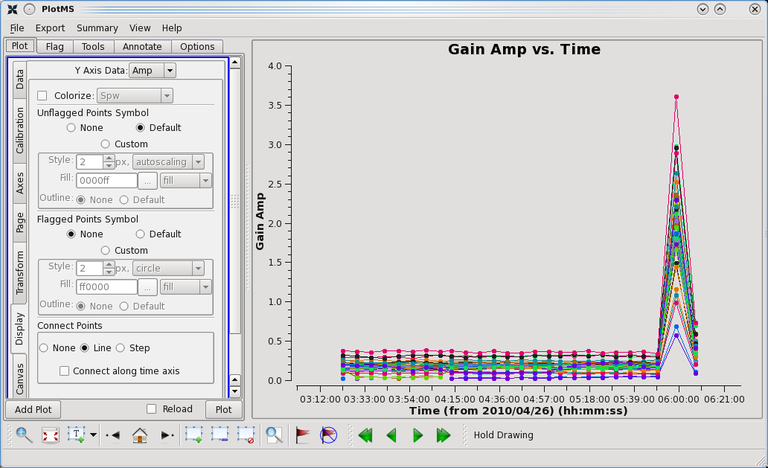</span>

|         |                                                                                                                                                                               |
|:--------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Type    | Figure 7                                                                                                                                                                      |
| ID      | plotms.plot.display                                                                                                                                                           |
| Caption | Plot Display tab showing the Connect Points options for a gain table.  Here, points with the same spw, channel, polarization, and antenna1 are connected along the time axis. |

<span style="font-size: 12pt; color: #000000;"><span
style="font-size: medium;">The plotms task parameters used to connect
points in a calibration table plot are *xconnector* (default "none",
options "line" or "step") and *timeconnector* (default False, or True to
connect along time axis instead of x-axis).  
</span></span>

------------------------------------------------------------------------

## <span style="font-size: 14pt;">1.7 Plot Labels: The Plot Canvas Tab </span>

### <span style="font-size: 12pt;">1.7.1 Plot Title </span>

<span style="font-size: medium;">Options to change the plot title
include *None* (no title), *Default,* and a user-input string.  To set
the plot title, under </span>*<span
style="font-size: medium;">Title</span>*<span
style="font-size: medium;">, click on the circle next to the input box
and enter the desired text. This text box shows the grayed-out default
string, "%%yaxis%% vs. %%xaxis%%" (to substitute the axis names for
"yaxis" and "xaxis").  The user can also choose the size of the title
font by checking the *Title Font* checkbox and entering the font size or
using the arrows to increase or decrease the value.  The default is to
scale the title font depending on the plot size.  
</span>

<span style="font-size: medium;"><span style="font-size: 12pt;">The
**plotms** task parameters used to set the title and its font are
*title* (default "" for yaxis vs. xaxis string) and *titlefont* (default
is 0 to autoscale).  Set *title='""* for the default title (Y vs. X) or
" " (space) for no title.</span> </span>

### <span style="font-size: 12pt;">1.7.2 Legend</span>

<span style="font-size: 12pt;"><span style="font-size: medium;">A plot
symbol legend can be added to the plot by clicking on the checkbox next
to </span>*<span style="font-size: medium;">Legend</span>*<span
style="font-size: medium;">. For a simple plot, </span><span
style="font-size: medium;">a symbol legend simply echoes the plot axes
(e.g. "Amp vs Time") but is useful when [overplotting
data](#7-1-overplotting-multiple-data-sets-on-the-same-plot) with custom
colors so that you can identify the data (e.g. "Amp vs Time" in blue and
"Phase vs Time" in green on the same plot).</span></span>

<span style="font-size: 12pt;"><span style="font-size: medium;">When
enabled, a drop-down menu next to *Legend* allows the user to select the
legend location either within the plot (Upper Right, Lower Right, Upper
Left, Lower Left) or outside the plot (Out Right, Out Left, Out Top, Out
Bottom).</span></span>

<span style="font-size: 12pt;"><span style="font-size: medium;">The
**plotms** task parameter used to enable the legend is *showlegend*
(default is False).  To select the legend location subparameter, set
*legendposition* to 'upperRight', 'upperLeft', 'lowerRight',
'lowerLeft', 'exteriorRight', 'exteriorLeft', 'exteriorTop', or
'exteriorBottom' (default is "" == upperRight).  
</span></span>

### <span style="font-size: 12pt;">1.7.3 Axis Labels </span>

<span style="font-size: medium;">To enable the X- and Y-axis labels,
check the *Show Label* checkboxes under </span>*<span
style="font-size: medium;">X Axis</span>*<span
style="font-size: medium;"> and </span>*<span
style="font-size: medium;">Y Axis </span>*<span
style="font-size: medium;">(default is checked).  As with the plot
title, the user may set the label to None (no label), Default (axis name
with units),* * or </span><span style="font-size: medium;">type the
desired text in the blank box.  The font size of labels can also be
customized by enabling then setting the font size for each axis.  The
location of axis labels is determined by the axis location as set in the
</span>*<span style="font-size: medium;">Plot </span><span
style="font-size: medium;">\></span><span style="font-size: medium;">
Axes</span>*<span style="font-size: medium;"> tab, as shown in [the
section above](#1-3-3-axis-locations).</span>

<span style="font-size: medium;"><span style="font-size: 12pt;">The
**plotms** task parameters used to set the label text and font
are *xlabel and ylabel* (default "" is axis name with units, set to ' '
space to disable label) and *xaxisfont* and *yaxisfont* (default 0 ==
autoscale).</span></span>

### <span style="font-size: 12pt;">1.7.4 Grid Lines </span>

<span style="font-size: medium;">A grid of lines can be superimposed on
the plot using </span>*<span style="font-size: medium;">Grid
Lines</span>*<span style="font-size: medium;"> in the </span>*<span
style="font-size: medium;">Plot </span><span
style="font-size: medium;">\></span><span style="font-size: medium;">
Canvas</span>*<span style="font-size: medium;"> tab. “Major” grid lines
are drawn at the locations of major tick marks, while “minor” grid lines
are drawn at minor tick marks.</span>

<span style="font-size: medium;">Grid line colors, thicknesses, and
styles are selected independently for the “major” and “minor” grid
lines. Desired line thickness should be typed into the blank boxes just
to the right of the </span>*<span
style="font-size: medium;">Major</span>*<span
style="font-size: medium;"> and </span>*<span
style="font-size: medium;">Minor</span>*<span
style="font-size: medium;"> labels. Colors are set by clicking on the
</span><span style="font-size: medium;"><span
style="font-weight: bold;">...</span></span><span
style="font-size: medium;"> buttons. The blank boxes to the left of the
</span><span style="font-size: medium;"><span
style="font-weight: bold;">...</span></span><span
style="font-size: medium;"> buttons will then contain the hex codes for
the selected colors (e.g., “808080”). Line styles can also be selected
from the drop-down menus to the right of </span><span
style="font-size: medium;"><span
style="font-weight: bold;">...</span></span><span
style="font-size: medium;"> buttons; style options include *solid, dash,
dot*, and *none*.  
</span>

<span style="font-size: medium;"><span style="font-size: 12pt;">The
**plotms** task parameter used to</span> add and customize major grid
lines include *showmajorgrid* (default is False) with subparameters
*majorwidth* (default is 1), *majorstyle* ('solid', 'dash', 'dot',
'none'; default is 'solid'), and *majorcolor* (RGB hex code or color
name; default is 'b0b0b0' dark gray).</span>

<span style="font-size: medium;">Parameters for minor grid lines include
*showminorgrid* (default is False) with subparameters *minorwidth*
(default is 0), *minorstyle* (default is 'solid'), and *minorcolor*
(default is 'd0d0d0' light gray).  
</span>

------------------------------------------------------------------------

# <span id="2--flag-extensions--the-flag-tab"></span><span style="font-size: 18pt;">2. Flag Extensions: The Flag Tab</span>

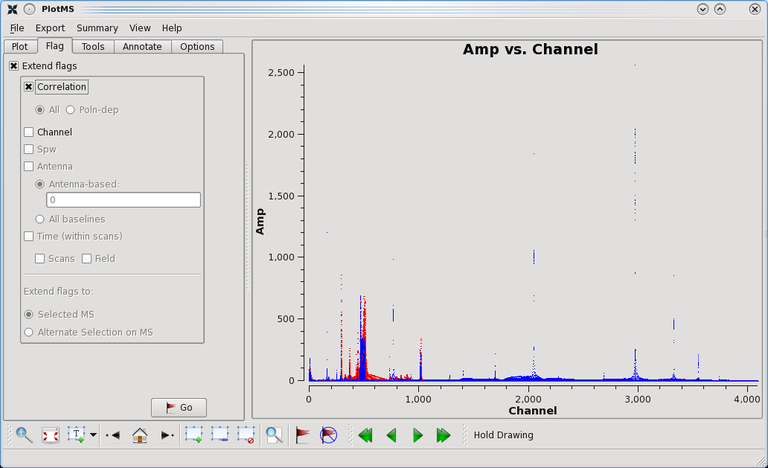

|         |                                                                                                                                                                                         |
|:--------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Type    | Figure 8                                                                                                                                                                                |
| ID      |                                                                                                                                                                                         |
| Caption | The plotms *Flag* tab.  Here the *Extend flags* box has been checked, enabling the *Correlation* and *Channel* options.  The plot shows unflagged data in blue and flagged data in red. |

<span style="font-size: 12pt;">See the section below on [interactive
flagging in plotms.](#8--interactive-flagging)  The options in this tab
allows the user to have flagging extend to other data points besides
what is marked on the plot.</span>

<span style="font-size: 12pt;">When enabled with the *Extend flags*
checkbox, the user may choose to extend flags based on correlation or
channel by checking the corresponding checkboxes.  Future options for
flag extensions are planned.</span>

<span style="font-size: medium;">By checking the boxes next to *<span
style="font-size: medium;">Extend Flags</span>*<span
style="font-size: medium;"> and </span>*<span
style="font-size: medium;">Correlation</span>*<span
style="font-size: medium;">*,* flags will be extended beyond the
correlations displayed. Currently the only option is to extend to
*All*</span><span style="font-size: medium;"> correlations as noted by
the radio button, implying that all correlations will be flagged.  For
example, with RR displayed, the correlations RR, RL, LR, and LL will all
be flagged when this option is enabled.</span></span>

<span style="font-size: medium;">By checking the boxes next to
</span>*<span style="font-size: medium;">Extend Flags</span>*<span
style="font-size: medium;"> and </span>*<span
style="font-size: medium;">Channel</span>*<span
style="font-size: medium;">, flagging will be extended to other channels
in the same </span><span style="font-size: medium;">spw</span><span
style="font-size: medium;"> as the displayed point. For example, if
</span><span style="font-size: medium;"><span
style="font-style: italic;">spw=’0:0’</span></span><span
style="font-size: medium;"> and channel 0 is displayed, then flagging
will extend to all channels in spw 0.</span>

<span style="font-size: 12pt;"><span style="font-size: medium;">The
**plotms** task parameter used to</span> extend flags is *extendflag*
(True/False, default is False) with subparameters *extcorr*
(True/False), and *extchannel* (True/False).  These parameters will
enable flag extensions when interactively flagging the plot.  
</span>

------------------------------------------------------------------------

# <span id="3--interactive-tools--the-tools-tab--annotate-tab--and-tool-icons"></span><span style="font-size: 14pt;"><span style="font-size: 18pt;">3. Interactive Tools: The Tools Tab, Annotate Tab, and Tool Icons</span> </span>

<span
style="font-size: 12pt;">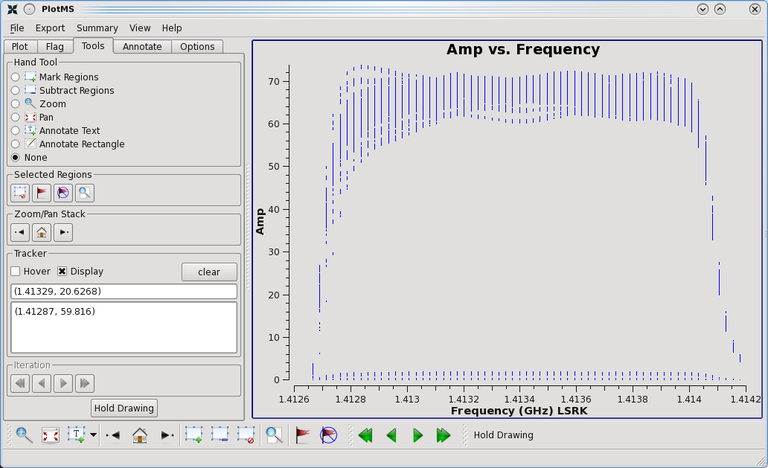</span>

|         |                                                                                                                                                                                         |
|:--------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Type    | Figure 9                                                                                                                                                                                |
| ID      |                                                                                                                                                                                         |
| Caption | The plotms Tools tab.  Here the Tracker Display tool is showing the (X,Y) coordinates of the cursor position.  A previous position was saved to the text box by pressing the SPACE bar. |

<span style="font-size: 12pt;">Various interactive GUI tools are
selectable with the radio buttons in the *Hand Tools* section of
the *Tools *tab at the top of the **plotms** window.  They are also
available as icon buttons at the bottom of the **plotms** window.  These
tools can be used to zoom, pan, annotate, flag/unflag, and locate data. 
Described below are the bottom icon buttons in order.  
</span>

<span
style="font-size: 12pt;"></span>

-   <span style="font-size: 12pt;">**Zoom** — The “magnifying glass”
    button (1st on left) lets you draw a box around a region of the plot
    (left-click on one corner of the box, and drag the mouse to the
    opposite corner of the desired box), and then zooms in on this
    box.</span>

-   <span style="font-size: 12pt;">**Pan** — The “four-arrow” button
    (2nd from left) lets you pan around a zoomed plot.</span>

-   <span style="font-size: 12pt;">**Annotate** — The 3rd button from
    the left is chosen from a drop-down menu to either *Annotate Text*
    (“T with a green diamond” button) or *Annotate Rectangle* (“pencil”
    button). With *Annotate Text* activated, click on a location in the
    plot where text is desired; a window will pop up, allowing you to
    type text in it. When you click the OK button, this text will appear
    on the plot. *Annotate Rectangle* simply lets you draw a box on the
    plot by left-clicking and dragging the mouse. By clicking on the
    *Annotate* tab near the top of the **plotms** window, different
    fonts, colors, line styles, etc. can be selected for
    annotations.</span>

-   <span style="font-size: 12pt;">**Stack Base** — The “house” button
    (5th from left) returns to the original zoom level.</span>

-   <span style="font-size: 12pt;">**Stack Back** and **Stack Forward**
    — The left and right arrow buttons (4th and 6th from left) step
    through the zoom settings you’ve visited.</span>

-   <span style="font-size: 12pt;">**Mark Regions** — The “box with a
    green diamond” button (7th from left) lets you mark a region for
    flagging, unflagging, or locating. Left-click on one corner of the
    desired region, and then drag the mouse to set the opposite corner
    of the region. You can mark multiple boxes before performing an
    operation on them.  The selected regions will appear on the plot as
    shaded rectangles.  
    </span>

-   <span style="font-size: 12pt;">**Subtract Regions** — The “box with
    a minus sign” button (8th from left) lets you de-select marked
    regions (draw around a marked region and the shaded area will
    disappear).  To de-select all marked regions, use the next button.  
    </span>

-   <span style="font-size: 12pt;">**Clear Regions** — Clicking on the
    “box with a red circle” button (9th from left) will clear all
    regions which have been marked using Mark Regions.</span>

-   <span style="font-size: 12pt;">**Locate** — The “magnifying glass on
    a sheet of paper” button (10th from left) will print out information
    about points in the marked regions.  This information is printed to
    the shell terminal when **plotms** was started with *casaplotms*, or
    to the casa logger/logfile when **plotms** was started in a casa
    python session.  The header of the output indicates the plotted X
    and Y axes and the range of values in the selected region.  The
    output for each point includes scan, field, time, baseline, spw,
    channel, frequency, correlation, X, Y, and observation ID.  By
    copying this list to a text file, or setting a new logfile with
    *casalog.setlogfile* as described in the [CASA logger
    documentation](https://casa.nrao.edu/casadocs-devel/stable/usingcasa/casa-logger),
    the *Locate* information can be edited to provide input for
    flagdata.  To list an entire column, e.g. all visibilities for a
    source, use the listvis task or the [table
    tools](https://casa.nrao.edu/casadocs-devel/stable/global-tool-list/tool_table).  
    </span>

-   <span style="font-size: 12pt;">**Flag** — Click on the “flag” button
    (11th from left) to flag all points in the marked regions.  See the
    section below on [Interactive Flagging](#8--interactive-flagging).  
    </span>

-   <span style="font-size: 12pt;">**Unflag** — Click on the
    “crossed-out flag” button (12th from left) to unflag any flagged
    points in the marked regions (even if not displayed).</span>

-   <span style="font-size: 12pt;">**Flag All** — Click on the "per-grid
    flag/unflag" button (13th from left) to enter/leave the "Flag All"
    mode. See the section below on [Interactive
    Flagging](#8--interactive-flagging).</span>

-   **<span style="font-size: 12pt;">Iteration </span>**<span
    style="font-size: 12pt;">— The next four green arrow buttons (14th
    through 17th from left) control iteration, with the first and last
    "double arrow" buttons used to display the first and last iteration,
    and the center two "single arrow" button to display the previous or
    next iteration.  If the plots are on a grid, these arrows navigate
    through the pages of plots which contain multiple iterations.</span>

-   <span style="font-size: 12pt;">**Hold Drawing** — If the *Hold
    Drawing* button (rightmost, or 18th from left) is clicked to
    activate it, when new plot axes are selected from the *Plot \> Axes*
    tab, the new data will be cached but not plotted. When the button is
    clicked again (de-activated), it will automatically plot the data
    that was last requested. This can be particularly useful when
    changing the size of the **plotms** window.</span>

<span style="font-size: 12pt;">The *Tools* tab also contains *Tracker*
tools including *Hover* and *Display.*  When *Hover* is selected and the
mouse is moved over the plot, the pointer's position is displayed on the
plot in (X, Y) format.  When *Display* is selected, the (X, Y) position
is displayed in the text box under the *Display* checkbox.</span>

<span style="font-size: 12pt;">To record various tracked positions,
enable *Display* then click on the plot to activate it.  As usual,
moving the pointer displays the position in the small display text box. 
Pressing the *SPACE* bar will copy the displayed line into the larger
white box below it. This can be repeated many times and a log of
positions and values will be created. The content in the box can then be
easily copied and pasted into any other application that is used for
data analysis. The *Clear* button wipes out the content of the box for a
fresh start into new scientific adventures.</span>

------------------------------------------------------------------------

# <span style="font-size: 14pt;"><span style="font-size: 18pt;">4. Miscellaneous Options: The Options Tab </span></span>

<span style="font-size: medium;">A few miscellaneous per-page plot
options and GUI options are available in the </span>*<span
style="font-size: medium;"><span
style="font-weight: bold;">Options</span></span>*<span
style="font-size: medium;"> tab, the last tab at the top of the
**plotms**</span><span style="font-size: medium;"> window.  
</span>

## <span id="4-1-plotting-on-a-grid"></span><span style="font-size: 14pt;">4.1 Plotting on a Grid</span>

<span style="font-size: 14pt;"><span style="font-size: 12pt;">The layout
of the page is set on the **plotms** *Options* tab. For multiple plots
per page, set the grid layout, the number of rows and columns that
determine the number of sub-plots.  When set, click "Update" to activate
the grid changes.</span></span>

### <span id="4-1-1-plotting-iterations-on-a-grid"></span><span style="font-size: 12pt;">4.1.1 Plotting Iterations on a Grid</span>

 

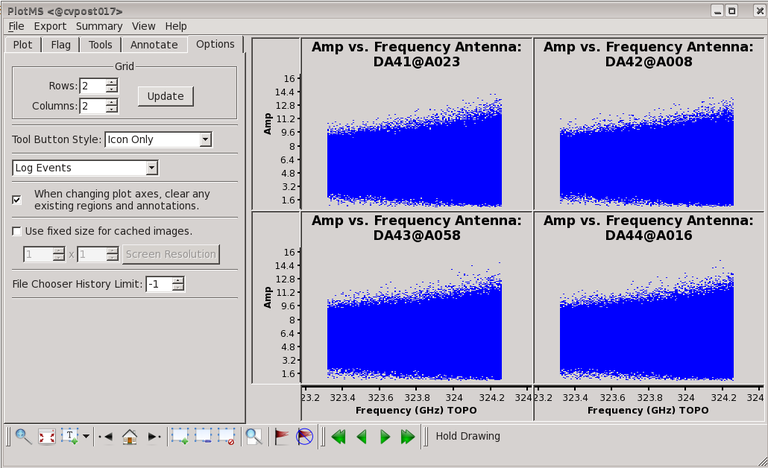 

|         |                                                                                                 |
|:--------|-------------------------------------------------------------------------------------------------|
| Type    | Figure 10                                                                                       |
| ID      |                                                                                                 |
| Caption | The plotms Options tab.  Here a 2x2 grid has been created with iteration on the 'antenna' axis. |

<span style="font-size: 12pt;">If
[iteration](#1-4-iteration--the-plot-page-tab) is enabled in the *Plot
\> Page* tab, the grid will be filled automatically with each iterated
plot.  The *Plot \> Page* tab is also where common axis scales and
shared axes will be set; they are enabled for the plot in Figure 9. 
These axis options are only available for iterated plots in a grid.  
</span>

<span style="font-size: 12pt;"><span style="font-size: medium;">The
**plotms** task parameters used to create a grid with iteration include
*gridrows and gridcols* (default is 1)*.* To create the plot shown in
Figure 9, the **plotms** command would be:  
</span></span>

<span style="font-size: 10pt;">plotms('ngc5921_ut.ms', xaxis='freq',
iteraxis='antenna', gridrows=2, gridcols=2, xsharedaxis=True,
xselfscale=True, ysharedaxis=True, yselfscale=True)</span>

### <span id="4-1-1-plotting-multiple-data-on-a-grid"></span><span style="font-size: 12pt;">4.1.2 Plotting Multiple Data on a Grid</span>

<span style="font-size: 12pt;">We note here that plotting multiple
datasets or axes on a grid is possible in **plotms** but covered
separately in the <span style="color: #ff0000;"><span
style="color: #000000;">[section
below](#6-2-plotting-multiple-datasets-or-axes-on-a-grid), as this
involves many settings in the GUI or multiple **plotms** task commands. 
Since the grid affects all of the plots, its settings are in the
*Options* tab rather than the *Plot* tab.</span></span></span>

## <span style="font-size: 14pt;">4.2 Tool Button Style </span>

<span style="font-size: 14pt;"><span style="font-size: 12pt;">The *Tool
Button Style* drop-down menu determines the format of the tool buttons
at the bottom of the **plotms** window. The options include *Icon Only,
Text Only, Text Beside Icon, and Text Under* Icon.  In *Icon Only* mode
(default), hovering the cursor over each icon will give a text
description of the icon.</span></span>

<span style="font-size: 14pt;"><span style="font-size: 12pt;">To hide
the bottom icons, see the description of the [View
menu](#5-2-view-menu). The tools can also be accessed in the *Tools*
tab.</span></span>

## <span style="font-size: 14pt;">4.3 Log Events </span>

<span style="font-size: 12pt;">This drop-down menu shows a checklist of
events and **plotms** functions so that you can customize <span
style="font-size: medium;">how verbose **plotms**</span><span
style="font-size: medium;"> is in documenting its actions.</span></span>

## <span style="font-size: 14pt;">4.4 Clear Regions and Annotations </span>

<span style="font-size: 12pt;">The *When changing plot axes, clear any
existing regions or annotations* checkbox determines when regions and
annotation are deleted from the plot. By default, this is
enabled.</span>

## <span style="font-size: 14pt;">4.5 Cached Images </span>

<span style="font-size: medium;">A useful option is the *Use*
</span>*<span style="font-size: medium;">fixed size for cached
image</span>*<span style="font-size: medium;"> checkbox. It determines
how large the dots in the panel are with respect to the screen
resolution. The values influence how the data is redrawn on the panel.
When </span>*<span style="font-size: medium;">Screen
resolution</span>*<span style="font-size: medium;"> is selected, the
**plotms**</span><span style="font-size: medium;"> window can be resized
without redrawing on the canvas – a considerable speedup for large data
sets. The penalty is that the dots of the data points are the size of a
pixel on the screen, which may be very small for high resolution
monitors.</span><span style="font-size: 12pt;">  By default, this
feature is not enabled.  
</span>

## <span style="font-size: 14pt;">4.6 File Chooser History Limit </span>

<span style="font-size: medium;">This setting allows the user to limit
how many remembered filepaths are displayed in file chooser dialogs
produced by clicking *Browse* in the *Plot \> Data* tab to select a
MeasurementSet or calibration table and in the *Plot \> Calibration* tab
to select a calibration library.</span>

------------------------------------------------------------------------

# <span style="font-size: 18pt;">5. The plotms Menus </span>

## <span style="font-size: 14pt;">5.1 File Menu: Quit </span>

<span style="font-size: 12pt;">The *File* menu in the top menu bar
allows you to *Quit* **plotms**, or you can click the *X in the upper
right corner of the window.*</span>

## <span style="font-size: 14pt;">5.2 Export Menu: Saving Your Plot </span>

<span style="font-size: medium;">You can save a copy of a plot to file
with the </span><span style="font-size: medium;">*Export* menu, which
produces an *Export Plots* dialog box with many settings</span><span
style="font-size: medium;">.</span>

-   <span style="font-size: medium;">**Filename**: Click the
    </span>*<span style="font-size: medium;">Browse</span>*<span
    style="font-size: medium;"> button for a GUI-based selection of the
    directory and filename to which the plot will be saved, or click the
    *Insert MS Name* button to minimize typing. You may also just type
    in a file name. </span><span style="font-size: medium;">The file
    format can be determined in this GUI by the suffix given to the
    filename: </span><span style="font-size: medium;"><span
    style="font-style: italic;">.png</span></span><span
    style="font-size: medium;">, </span><span
    style="font-size: medium;"><span
    style="font-style: italic;">.jpg</span></span><span
    style="font-size: medium;">, </span><span
    style="font-size: medium;"><span
    style="font-style: italic;">.ps</span></span><span
    style="font-size: medium;">, </span><span
    style="font-size: medium;"><span
    style="font-style: italic;">.pdf</span></span><span
    style="font-size: medium;">, and </span><span
    style="font-size: medium;"><span
    style="font-style: italic;">txt</span></span><span
    style="font-size: medium;"><span
    style="font-size: medium;">. </span></span>
    <span style="font-size: medium;">If a file already exists with the
    given filename, it will be overwritten without warning!</span>
-   <span style="font-size: medium;">**Format**: Alternatively, the file
    format can be selected from the </span>*<span
    style="font-size: medium;">Format</span>*<span
    style="font-size: medium;"> drop-down menu, with these options: \[by
    file extension\], PNG, JPG, PS, PDF, and TEXT</span><span
    style="font-size: medium;">. For the first option, if your filename
    is "test.jpg" the plot will be exported in JPG format.  For the
    other formats, **plotms** will use the filename as given and **not**
    </span><span style="font-size: medium;">add a suffix to indicate its
    format. See below for an example of TEXT format; the header will
    include the name of the visibility and other specified parameters
    including selection, averaging, transformations, etc.  
    </span>
-   <span style="font-size: medium;">**Verbose**: When a text export is
    selected, the output can be verbose (include metadata).  When this
    checkbox is unchecked, the text export will include x and y values
    only.  This parameter is ignored for other formats.</span>
-   <span style="font-size: medium;">**Range**: When iteration is
    chosen, producing multiple plots, y</span><span
    style="font-size: medium;">ou may select to export only the *Current
    Page* or A*ll Pages***.**  Each saved plot will have the name of the
    iteration appended to the given filename before the extension.  For
    example, with filename "ngc5921_ut.jpg" and iteration on antenna,
    the first plot will be named "ngc5921_ut_Antenna1@VLA:N7.jpg".  This
    is so the exported plots can be identified without viewing them.  Be
    warned that if you are plotting iterations on a grid, the filenames
    will have all of the iterations on the page appended, which can lead
    to a very long filename. Filenames exceeding 255 characters in
    length will be automatically shortened upon export. One plotfile per
    page is produced; multipage pdf exports are not currently
    supported.  
    </span>
-   **<span style="font-size: medium;">High</span><span
    style="font-size: medium;"> Resolution:</span>**<span
    style="font-size: medium;"> Exporting to images in screen resolution
    is currently not working, so plot exports are always high
    resolution.  A notice is issued in the console/log.</span>
-   **<span style="font-size: medium;">DPI, Size</span>**<span
    style="font-size: medium;">: Use the text boxes or up/down arrows to
    set the output DPI or size (in pixels) of the exported plot.</span>
-   <span style="font-size: medium;">**Export**: When settings are
    complete, click *Export* to create your plotfile.</span>

<span style="font-size: medium;"><span
style="font-weight: bold;">Note:</span></span><span
style="font-size: medium;"> The plot files produced by the PS and PDF
options can be large and time-consuming to export. The JPG is the
smallest.</span>

<span style="font-size: medium;">The <span
style="font-size: medium;">TEXT</span><span style="font-size: medium;">
format will not save an image but all of the data points themselves.
This allows one to dump the current plot into a file that is used in
other programs for further processing. </span></span>

<span style="font-size: medium;"><span style="font-size: 10pt;"><span
style="font-size: 12pt;">**ALERT**: The exported TEXT file can be quite
large and take some time to create.  Using averaging, selection, etc. is
recommended to keep the file size manageable.  If a region is marked as
described in section 3, only those points are exported to the text
file.</span>  
</span></span>

<span style="font-size: medium;">The reported data is the same as when
using the *L*</span>*<span style="font-size: medium;">ocate</span>*<span
style="font-size: medium;"> button in **plotms**, with the following
format (when *verbose=True*):</span>

\# vis: ngc5921_ut.ms  
\# scan: 4  
\# channel average: 63  
\# time average: None  
\# From plot 0  
\# x y chan scan field ant1 ant2 ant1name ant2name time freq spw corr
obs  
\# Time Amp None None None None None None None MJD(seconds) GHz None
None None  
4304483429.999 62.7219 0 4 1 1 1 2@VLA:W1 2@VLA:W1 4304483429.999
1.413332233 0 RR 0  
4304483429.999 59.0717 0 4 1 1 1 2@VLA:W1 2@VLA:W1 4304483429.999
1.413332233 0 LL 0  
4304483429.999 59.0252 0 4 1 27 27 28@VLA:W7 28@VLA:W7 4304483429.999
1.413332233 0 RR 0  
4304483429.999 60.8603 0 4 1 27 27 28@VLA:W7 28@VLA:W7 4304483429.999
1.413332233 0 LL 0  
4304483429.999 57.4048 0 4 1 7 7 8@VLA:W8 8@VLA:W8 4304483429.999
1.413332233 0 RR 0  
etc.

<span style="font-size: medium;">where x and y are the two plotted axes
and the other columns contain additional information such as the
baselines and frequencies, with an additional line for units.  The
header for the file includes the name of the visibility and other
parameters such as selection, averaging, etc.  
</span>

<span style="font-size: 12pt;"><span style="font-size: 12pt;"><span
style="font-size: medium;">The **plotms** task parameter used to export
plots is *plotfile.*  Unlike the Export Plots dialog box in the GUI,
**plotms** will issue an error if this file exists unless
*overwrite=True*.  Its subparameters include:</span></span></span>

-   <span style="font-size: 12pt;"><span style="font-size: 12pt;"><span
    style="font-size: medium;"> *expformat* ('jpg', 'png', 'pdf', 'ps',
    'txt') - select the format if no extension is included in the
    *plotfile*. If there is no *plotfile* extension and no *expformat*
    set, the plot will be exported as a PNG.  
    </span></span></span>
-   <span style="font-size: 12pt;"><span style="font-size: 12pt;"><span
    style="font-size: medium;">verbose (True/False, default is True) -
    include metadata in text export; ignored for other
    formats.</span></span></span>
-   *<span style="font-size: 12pt;"><span style="font-size: 12pt;"><span
    style="font-size: medium;">exprange </span></span></span>*<span
    style="font-size: 12pt;"><span style="font-size: 12pt;"><span
    style="font-size: medium;">('current', 'all'; defaults to
    current)</span></span></span><span style="font-size: 12pt;"><span
    style="font-size: 12pt;"><span style="font-size: medium;">  
    </span></span></span>
-   <span style="font-size: 12pt;"><span style="font-size: 12pt;"><span
    style="font-size: medium;">*highres* (True/False, default is
    False)  
    </span></span></span>
-   *<span style="font-size: 12pt;"><span style="font-size: 12pt;"><span
    style="font-size: medium;">dpi</span></span></span>*
-   <span style="font-size: 12pt;"><span style="font-size: 12pt;"><span
    style="font-size: medium;">*width* (in pixels)</span></span></span>
-   <span style="font-size: 12pt;"><span style="font-size: 12pt;"><span
    style="font-size: medium;">*height* (in pixels)</span></span></span>
-   *<span style="font-size: 12pt;"><span style="font-size: 12pt;"><span
    style="font-size: medium;">overwrite</span></span></span>*<span
    style="font-size: 12pt;"><span style="font-size: 12pt;"><span
    style="font-size: medium;"> (True/False,
    de</span></span></span><span style="font-size: 12pt;"><span
    style="font-size: 12pt;"><span style="font-size: medium;">fault is
    False)</span></span></span>

## <span id="5-3-summary-menu--information-about-your-dataset"></span><span id="5-2-summary-menu"></span><span style="font-size: 14pt;">5.3 Summary Menu: Information About Your Dataset </span>

<span style="font-size: medium;">Information about the MeasurementSet
can be obtained from within **plotms**</span><span
style="font-size: medium;"> by clicking on the </span>*<span
style="font-size: medium;">Summary</span>*<span
style="font-size: medium;"> menu in the top menu bar. If *All* is chosen
from the pull-down menu next to </span>*<span
style="font-size: medium;">Type</span>*<span
style="font-size: medium;">, </span><span
style="font-size: medium;"><span
style="font-family: monospace;">listobs</span></span><span
style="font-size: medium;">-style output about scans, correlator
configurations, and antennae will be written to the console or log. 
Other options for a subset of the data include *Where, What, How, Main,
Tables, Antenna, Feed, Field, Observation, History, Polarization,
Source, Spectral Window, Spectral Window and Polarization, SysCal*, and
*Weather*.</span>

<span style="font-size: medium;">For calibration tables, options in the
*Summary* menu include *All, Where, What, How, Main, Tables, Antenna,
Field, Observation, History,* and *Spectral Window*.</span>

<span style="font-size: medium;">For more detail, click on the
</span>*<span style="font-size: medium;">Verbose</span>*<span
style="font-size: medium;"> checkbox.</span>

## <span id="5-2-view-menu"></span><span style="font-size: 14pt;">5.4 View Menu: Hide or Display Tool Icons </span>

<span style="font-size: 12pt;">This menu controls the display of tool
icons.  Use the *View \> Toolbars* menu to de-select and hide the
*Tools, Iteration* (green arrows), or *Display* (Hold Drawing) icons. 
By default these icons are all selected and displayed at the bottom of
the **plotms** window.</span>

## <span style="font-size: 14pt;">5.4 Help Menu: About **plotms** </span>

<span style="font-size: 12pt;">This menu's *About* option describes
**plotms** and the versions of CASA, Qt, and Qwt it uses, along with
links.  Qt is the software framework that **plotms** uses for its GUI,
and Qwt is a library that provides plotting functionality on top of the
Qt framework.</span>

<span style="font-size: 12pt;">Click *About Qt*  for more detail about
this software package and its licensing.</span>

------------------------------------------------------------------------

# <span style="font-size: 18pt;">6. Plotting Multiple Data</span>

## <span id="7-1-overplotting-multiple-data-sets-on-the-same-plot"></span><span style="font-size: 14pt;">6.1 Overplotting Multiple Datasets or Axes on the Same Plot</span>

<span style="font-size: medium;">It is possible to overplot two datasets
on the same plot, or the same dataset with different y-axes in each
plot.  To do this, set up the first plot as usual.  Then press the *Add
Plot* button at the bottom left of the **plotms** window. This will
bring up an additional data input panel in the *Plot \> Data* tab where
you can specify the plot parameters as you did for the first one, which
is automatically minimized.  Use the slider to scroll vertically through
the panels.  Use right-click options or the *Minimize, Maximize*, or
*Close* buttons to keep a better overview on the individual
datasets.</span>

<span style="font-size: medium;">When overplotting, you may want to set
different custom colors for each dataset in its *Display* tab.  If you
are plotting different axes or the axes ranges are a significantly
different range of values, you may want to set different axes locations
for each plot in the *Axes* tab.  When you are done, click the *Plot*
button to see the overplot.</span>

<span style="font-size: medium;">Use the *Close* button in each data
panel to close the panel and remove that plot.</span>

<span style="font-size: medium;">In the **plotms**</span><span
style="font-size: medium;"> task interface, you can overplot by invoking
**plotms** </span><span style="font-size: medium;">more than once with
</span><span style="font-size: medium;"><span
style="font-style: italic;">clearplots=False</span></span><span
style="font-size: medium;">. Each **plotms** command </span><span
style="font-size: medium;">corresponds to a plot to go on top of
previous ones, and each must have its own *plotindex* (0-based, default
is 0).  Otherwise, with the same plotindex, the second plot will
overwrite the first.  In the following example, we are plotting Scan vs.
Time for MeasurementSet test1.ms with plotindex 0, and Field vs. Time
for MeasurementSet test2.ms on the same  plot with plotindex 1.  The
test2 data is a different color and its yaxis is on the right.</span>

<span style="font-size: medium;">Note that since the *plotindex* is an
index into subplots, this parameter must be assigned in consecutive
order.  If a *plotindex* is skipped, plotms will adjust the index number
and inform the user of the corrected *plotindex* value.  
</span>

<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">plotms(vis='test1.ms',
yaxis='scan')  
plotms(vis='test2.ms', yaxis='field', plotindex=1, clearplots=False,
customsymbol=True, symbolcolor='00FF00', yaxislocation='right')</span>

## <span id="6-2-plotting-multiple-datasets-or-axes-on-a-grid"></span><span id="7-2-plotting-multiple-data-sets-on-a-grid"></span><span style="font-size: 14pt;">6.2 Plotting Multiple Datasets or Axes on a Grid </span>

<span style="font-size: 12pt;">**plotms** allows you to plot more than
one dataset or axes on the same page by [specifying a grid
size](#4-1-plotting-on-a-grid) then a grid location for each plot as
described below. Here is an example of two plots with different
datasets:  
</span>

<span
style="font-size: 12pt;">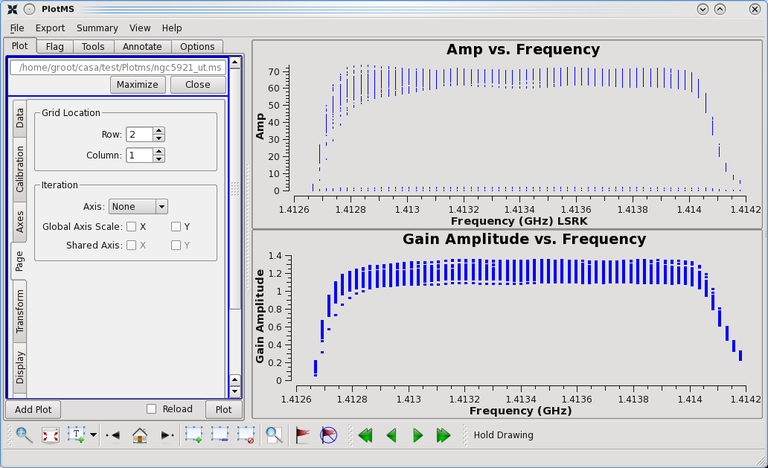</span>

|         |                                                                                                                                                                                                               |
|:--------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Type    | Figure 11                                                                                                                                                                                                     |
| ID      |                                                                                                                                                                                                               |
| Caption | Plotting multiple data sets on a 2x1 grid.  Here, the MS is plotted in grid location (1,1).  Then the *Add Plot* button was used to select its bandpass calibration table and plot it in grid location (2,1). |

<span style="font-size: medium;">The process is similar to the one
above, except that you specify the grid  and each plot's location:  
</span>

1.  <span style="font-size: medium;">Set up your first plot as described
    above.</span>
2.  <span style="font-size: medium;">Use the *Options* tab to set up a
    grid by incrementing the number of rows and/or columns.  By default
    the plot you set up in step 1 will be in row 0, column 0.</span>
3.  <span style="font-size: medium;">Use the *Add Plot* button to set up
    the second plot's parameters. Pay particular attention to the new
    dataset's *Page* tab, where you can set the *Grid Location* (row and
    column number) of the new plot.  This section appears only when a
    grid is set up.</span>
4.  <span style="font-size: medium;">Unlike iteration, you cannot share
    axes among the plots.</span>
5.  <span style="font-size: medium;">Add as many plots as you desire to
    fill your grid, then click *Plot.*</span>

<span style="font-size: medium;">Several **plotms** task parameters are
used to create a grid and specify a plot location.</span>

-   <span style="font-size: medium;"><span
    style="font-style: italic;">gridcols</span></span><span
    style="font-size: medium;"> and </span><span
    style="font-size: medium;"><span
    style="font-style: italic;">gridrows</span></span><span
    style="font-size: medium;"> define the number of plots on the
    screen.</span>
-   <span style="font-size: medium;"><span
    style="font-style: italic;">colindex</span></span><span
    style="font-size: medium;"> and </span><span
    style="font-size: medium;"><span
    style="font-style: italic;">rowindex </span>(0-based) set the
    location of an individual plot</span>
-   <span style="font-size: medium;"><span
    style="font-style: italic;">plotindex </span>(0-based) must be
    incremented by 1 for each **plotms** call</span>
-   <span style="font-size: medium;">*clearplots* is set to False to
    keep previous plots</span>

<span style="font-size: medium;">Here is an example of multiple
**plotms**</span><span style="font-size: medium;"> calls to set up two
plots on a grid and export the plot page; note the defaults on the first
call are *rowindex=0, colindex=0, plotindex=0* so just set up the grid. 
On each subsequent **plotms** call set *clearplots=False* and increment
the *plotindex* by 1*. * To save the gridded plot, set a *plotfile* on
the final plot.  
</span>

<span
style="font-size: 10pt; font-family: courier new,courier,monospace;">plotms(vis='test1.ms',
yaxis='field', gridrows=2, gridcols=1)  
plotms(vis='test2.ms', yaxis='field', gridrows=2, gridcols=1,
rowindex=1, colindex=0, plotindex=1, clearplots=False,
plotfile='fields.jpg')</span>

------------------------------------------------------------------------

# <span id="8--interactive-flagging"></span><span id="interactive-flagging"></span><span style="font-size: 18pt;">7. Interactive Flagging</span>

<span style="font-size: medium;">Interactive flagging, on the principle
of “see it — flag it”, is possible on the X-Y display of the data
plotted by **plotms**</span><span style="font-size: medium;">. Use the
cursor to mark one or more regions, and then flag, unflag, or list
([*Locate*](#3--interactive-tools--the-tools-tab--annotate-tab--and-tool-icons))
the data that falls in these regions of the display.</span>

<span style="font-size: 12pt;">Do not attempt to flag data while another
task is accessing the same data set.</span>

<span style="font-size: medium;">For plotting, **plotms** opens the
MeasurementSet read-only, so there should be no problem if another task
accesses the same dataset, unless the other task locks the file.  When
this happens, you can wait for the lock to be released, cancel
cache-loading in the **plotms** dialog box, type *go clearstat* at the
prompt, or exit **plotms.** Do not attempt to flag data in **plotms**
while another task is accessing the same data set, as in this case
**plotms** must open the MeasurementSet with a file lock for
writing.</span>

<span style="font-size: medium;">Using the row of icons at the bottom of
the **plotms**</span><span style="font-size: medium;">
window</span><span style="font-size: medium;">, click on the
</span>*<span style="font-size: medium;">Mark Regions</span>*<span
style="font-size: medium;"> button, then mark a region by left-clicking
and dragging the mouse.  Each click and drag will mark an additional
region. You can remove all of your marked regions by clicking on the
</span>*<span style="font-size: medium;">Clear Regions</span>*<span
style="font-size: medium;"> button</span><span
style="font-size: medium;">. Once regions are marked, you can then click
on one of the other buttons to take action:</span>

1.  <span style="font-size: medium;"><span
    style="font-weight: bold;">Flag</span></span><span
    style="font-size: medium;"> — flag all of the points in the
    region(s),</span>
2.  <span style="font-size: medium;"><span
    style="font-weight: bold;">Unflag</span></span><span
    style="font-size: medium;"> — unflag flagged points in the
    region(s),</span>
3.  <span style="font-size: medium;"><span
    style="font-weight: bold;">Locate</span></span><span
    style="font-size: medium;"> — list information (X and Y value, scan,
    field, baseline, frequency, etc.) about the points in the region(s)
    to the command line or log (Warning: this could be a long
    list!).</span>

<span style="font-size: medium;">Note that if you mark a region with
flagged and unflagged values and *Flag* it, using *Unflag* will not
return the data to its previous state but will unflag **all** of the
data in the marked region.</span>

<span style="font-size: medium;">The following figure </span><span
style="font-size: medium;">shows an example of marking regions and then
clicking the </span>*<span style="font-size: medium;">Flag</span>*<span
style="font-size: medium;"> button. Whenever you click on a button, that
action occurs without requiring an explicit disk-write. If you quit
**plotms**</span><span style="font-size: medium;"> and re-enter, you
will see your previous edits because your flag changes were written to
the MeasurementSet on disk.</span>

------------------------------------------------------------------------

<span
style="font-size: medium;">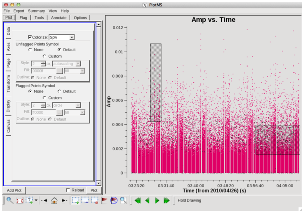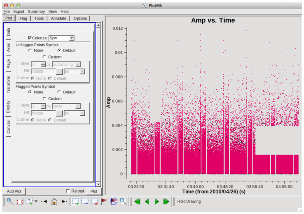</span>

|         |                                                                                                                                                                                                                                                                                                          |
|:--------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Type    | Figure 12                                                                                                                                                                                                                                                                                                |
| ID      |                                                                                                                                                                                                                                                                                                          |
| Caption | <span style="font-size: 12pt;">Plot of amplitude versus time, before (top) and after (bottom) flagging two marked regions. Note that flagged data is not displayed so these regions are hidden after flagging.  To unflag these regions, mark the two same regions and click the *Unflag* button.</span> |

 

------------------------------------------------------------------------

New interactive flagging is available in CASA 5.5 and later. You have a
new button **Flag All**, which is located next to the **Unflag **button,
and can turn on and off "Flag all/Unflag all" mode by clicking it.
Instead of flag/unflag operation on selected region, the "Flag
all/Unflag all" mode allows you to flag/unflag whole data associated
with the grid. The usage of this mode is as follows:

1.  Press the **Flag All** button -- You now enter the "Flag all/Unflag
    all" mode. Background color of completely flagged grids will become
    yellow.  
    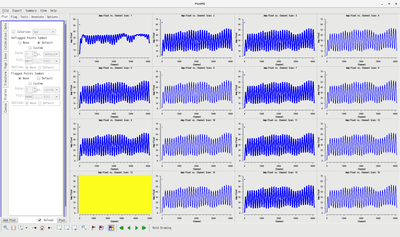  
2.  Select grids to flag/unflag -- You can click each grid to select for
    flag/unflag when the mode is active. Unflag is selected for the
    grids where all data are already flagged, otherwise flag is
    selected. The background color of the grids selected for flag will
    change to yellow while the grids selected for unflag will change to
    the default color.  
      
    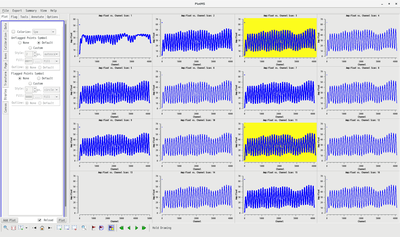  
3.  Press the **Flag All** button again -- You now leave the "Flag
    all/Unflag all" mode. At this moment, flag/unflag operations are
    applied to the data of the currently displayed grids selected in the
    previous step, and each grid is updated accordingly.   
    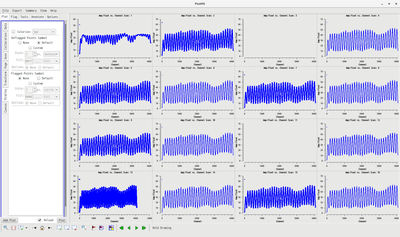

<span style="font-size: 12pt;">**WARNING:**  On macOS, the "Flag
all/Unflag all" mode doesn't work as expected!</span>

<span style="font-size: medium;">On macOS, background color of grids
doesn't yet change properly although flag/unflag operations work fine.
It is not recommended to use this mode on macOS.</span>

<span style="font-size: 12pt;">**WARNING:**  You cannot "undo" flagging
to a previous state!</span>

<span style="font-size: medium;">**plotms** does not automatically
create flag backups in the </span><span style="font-size: medium;"><span
style="font-style: italic;">\<msname\>.flagversions</span></span><span
style="font-size: medium;"> file. It is thus recommended to save the
initial flags with the flagmanager</span><span
style="font-size: medium;"> task </span><span
style="font-size: medium;">before starting **plotms**</span><span
style="font-size: medium;"> interactive flagging. Important intermediate
flagging stages may also be saved during **plotms**</span><span
style="font-size: medium;"> flagging in the same fashion.  Flagging can
also be performed using the interactive msview task or scripted with the
flagdata or flagcmd tasks.  
</span>

<span style="font-size: medium;">Flags can also be extended with options
in the </span>[*<span style="font-size: medium;">Flag</span>*<span
style="font-size: medium;">
tab;</span>](#2--flag-extensions--the-flag-tab)<span
style="font-size: medium;"> see this section for a more detailed
description of these options. Flag extension enables the user to plot a
subset of the data and extend the flagging to a wider set. In this
release, the only functional extensions are over correlation and
channel.</span>

<span style="font-size: 12pt;"><span
style="font-weight: bold;">WARNING:</span>  Use of flag extensions may
lead to deletion of much more data than desired. Be careful!</span>

<span style="font-size: 12pt;"><span
style="font-weight: bold;">WARNING:</span>  Interactive flagging doesn't
support a collaboration with **Iteration** buttons! </span>

<span style="font-size: medium;">The flag/unflag operations are applied
to currently displayed grids only, although you can move to other
iterations in the "Flag all/Unflag all" mode.</span>

------------------------------------------------------------------------

# <span style="font-size: 18pt;">8. Scripting With No GUI</span>

<span style="font-size: 12pt;">When scripting to produce exported
plotfiles, you may want to set the **plotms** parameter *showgui=False*
to suppress the GUI and pop-up dialog boxes.  The default is
True.</span>

------------------------------------------------------------------------

# <span style="font-size: 18pt;">9. Exiting **plotms** </span>

<span style="font-size: medium;">To exit the **plotms**</span><span
style="font-size: medium;"> GUI, select </span>*<span
style="font-size: medium;">Quit</span>*<span style="font-size: medium;">
from the </span>*<span style="font-size: medium;">File</span>*<span
style="font-size: medium;"> menu at the top of the
**plotms**</span><span style="font-size: medium;"> window. You can also
dismiss the window by killing it with the “X” on the frame.</span>

<span style="font-size: medium;">Alternatively, you can just leave it
alone, and **plotms** </span><span style="font-size: medium;">will keep
running in the background and update with each subsequent **plotms**
call. If the data file changes in the background while you are using
other tasks, you can force reloading the data via the *Reload* checkbox
next to the *Plot* button, or press SHIFT while clicking on *Plot* for
the same purpose.</span>

<span style="font-size: medium;">If started in a casa session,
**plotms** will automatically quit when the session is ended.</span>